In [79]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from os.path import join, isfile
from os import path, scandir, listdir

from source.aggregated_stats import process_details, full_stats

pd.set_option("max_columns", 300)

In [2]:
def list_all_files(location='../input/', pattern=None, recursive=True):
    """
    This function returns a list of files at a given location (including subfolders)
    
    - location: path to the directory to be searched
    - pattern: part of the file name to be searched (ex. pattern='.csv' would return all the csv files)
    - recursive: boolean, if True the function calls itself for every subdirectory it finds
    """
    subdirectories= [f.path for f in scandir(location) if f.is_dir()]
    files = [join(location, f) for f in listdir(location) if isfile(join(location, f))]
    if recursive:
        for directory in subdirectories:
            files.extend(list_all_files(directory))
    if pattern:
        files = [f for f in files if pattern in f]
    return files

In [3]:
men_comp = list_all_files('data/raw_men/')

In [4]:
men_comp

['data/raw_men/SampleSubmissionStage1.csv',
 'data/raw_men/2019 NCAAM Tournament Solution File.csv',
 'data/raw_men/SampleSubmissionStage2.csv',
 'data/raw_men/MasseyOrdinals/MasseyOrdinals.csv',
 'data/raw_men/Stage2DataFiles/SecondaryTourneyTeams.csv',
 'data/raw_men/Stage2DataFiles/Conferences.csv',
 'data/raw_men/Stage2DataFiles/Cities.csv',
 'data/raw_men/Stage2DataFiles/Teams.csv',
 'data/raw_men/Stage2DataFiles/NCAATourneySlots.csv',
 'data/raw_men/Stage2DataFiles/NCAATourneySeedRoundSlots.csv',
 'data/raw_men/Stage2DataFiles/TeamCoaches.csv',
 'data/raw_men/Stage2DataFiles/GameCities.csv',
 'data/raw_men/Stage2DataFiles/Seasons.csv',
 'data/raw_men/Stage2DataFiles/SecondaryTourneyCompactResults.csv',
 'data/raw_men/Stage2DataFiles/NCAATourneyDetailedResults.csv',
 'data/raw_men/Stage2DataFiles/TeamSpellings.csv',
 'data/raw_men/Stage2DataFiles/NCAATourneyCompactResults.csv',
 'data/raw_men/Stage2DataFiles/TeamConferences.csv',
 'data/raw_men/Stage2DataFiles/RegularSeasonDetaile

# submission file

In [5]:
df = pd.read_csv(men_comp[0])
df[['year', 'Team_1', 'Team_2']] = pd.DataFrame(df['ID'].str.split('_').values.tolist(), index=df.index)
df['year'] = pd.to_numeric(df.year)
df.head()

,ID,Pred,year,Team_1,Team_2
0,2014_1107_1110,0.5,2014,1107,1110
1,2014_1107_1112,0.5,2014,1107,1112
2,2014_1107_1113,0.5,2014,1107,1113
3,2014_1107_1124,0.5,2014,1107,1124
4,2014_1107_1140,0.5,2014,1107,1140


In [6]:
df.year.value_counts(dropna=False)

2015    2278
2014    2278
2018    2278
2017    2278
2016    2278
Name: year, dtype: int64

In [7]:
df = pd.read_csv(men_comp[1])
df[['year', 'Team_1', 'Team_2']] = pd.DataFrame(df['ID'].str.split('_').values.tolist(), index=df.index)
df['year'] = pd.to_numeric(df.year)
df.head()

,ID,Pred,year,Team_1,Team_2
0,2019_1101_1113,-1,2019,1101,1113
1,2019_1101_1120,-1,2019,1101,1120
2,2019_1101_1124,-1,2019,1101,1124
3,2019_1101_1125,-1,2019,1101,1125
4,2019_1101_1133,-1,2019,1101,1133


In [8]:
df.year.value_counts(dropna=False)

2019    2278
Name: year, dtype: int64

# Teams.csv

In [9]:
[file for file in men_comp if 'Teams.csv' in file]

['data/raw_men/Stage2DataFiles/SecondaryTourneyTeams.csv',
 'data/raw_men/Stage2DataFiles/Teams.csv',
 'data/raw_men/DataFiles/SecondaryTourneyTeams.csv',
 'data/raw_men/DataFiles/Teams.csv']

In [10]:
df = pd.read_csv('data/raw_men/Stage2DataFiles/Teams.csv')
df.shape

(366, 4)

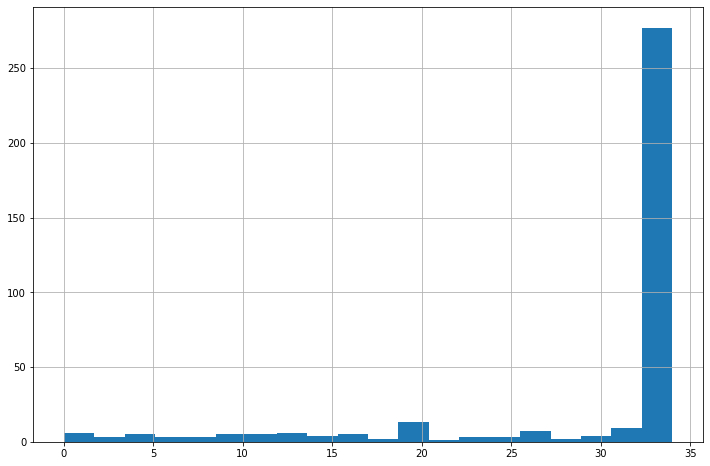

In [11]:
df['years_in_d1'] = df['LastD1Season'] - df['FirstD1Season']

df['years_in_d1'].hist(bins=20, figsize=(12,8))

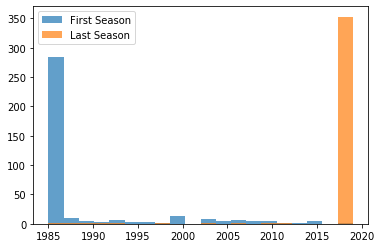

In [12]:
df.FirstD1Season.hist(bins=20, alpha=0.7, label='First Season')
df.LastD1Season.hist(bins=20, alpha=0.7, label='Last Season')
plt.grid(False)
plt.legend()

In [13]:
yr_count = pd.DataFrame({'year': np.arange(1985, 2020)})

for year in yr_count.year:
    df['is_in'] = 0
    df.loc[(df.FirstD1Season <= year) & (df.LastD1Season >= year), 'is_in'] = 1
    tot_teams = df.is_in.sum()
    yr_count.loc[yr_count.year == year, 'n_teams'] = tot_teams

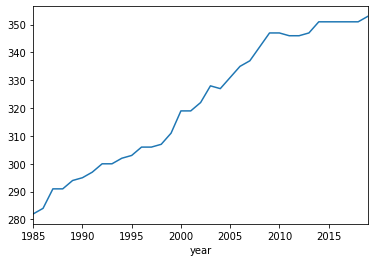

In [14]:
yr_count = yr_count.set_index('year')
yr_count.n_teams.plot()

# Seasons.csv

In [15]:
[file for file in men_comp if 'Seasons.csv' in file]

['data/raw_men/Stage2DataFiles/Seasons.csv',
 'data/raw_men/DataFiles/Seasons.csv']

In [16]:
df = pd.read_csv('data/raw_men/Stage2DataFiles/Seasons.csv')
print(df.shape)
df.head()

(35, 6)


,Season,DayZero,RegionW,RegionX,RegionY,RegionZ
0,1985,10/29/1984,East,West,Midwest,Southeast
1,1986,10/28/1985,East,Midwest,Southeast,West
2,1987,10/27/1986,East,Southeast,Midwest,West
3,1988,11/2/1987,East,Midwest,Southeast,West
4,1989,10/31/1988,East,West,Midwest,Southeast


In [17]:
df.RegionW.value_counts()

East           32
Atlanta         2
Albuquerque     1
Name: RegionW, dtype: int64

In [18]:
df.RegionX.value_counts()

Midwest      11
West          9
South         8
Southeast     4
Phoenix       1
Chicago       1
Oakland       1
Name: RegionX, dtype: int64

In [19]:
df.RegionY.value_counts()

Midwest           20
Southeast          6
South              6
Minneapolis        1
EastRutherford     1
Austin             1
Name: RegionY, dtype: int64

In [20]:
df.RegionZ.value_counts()

West            23
Southeast        4
South            4
WashingtonDC     1
Syracuse         1
Southwest        1
StLouis          1
Name: RegionZ, dtype: int64

# Regular season compact results

In [21]:
[file for file in men_comp if 'RegularSeasonCompact' in file]

['data/raw_men/Stage2DataFiles/RegularSeasonCompactResults.csv',
 'data/raw_men/DataFiles/RegularSeasonCompactResults.csv']

In [22]:
df = pd.read_csv('data/raw_men/Stage2DataFiles/RegularSeasonCompactResults.csv')
print(df.shape)
df.head()

(161552, 8)


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,20,1228,81,1328,64,N,0
1,1985,25,1106,77,1354,70,H,0
2,1985,25,1112,63,1223,56,H,0
3,1985,25,1165,70,1432,54,H,0
4,1985,25,1192,86,1447,74,H,0


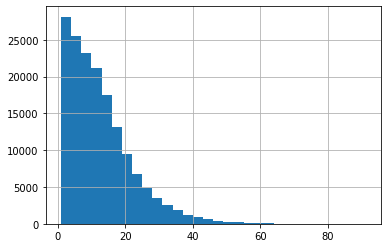

In [23]:
df['point_diff'] = df.WScore - df.LScore
df.point_diff.hist(bins=30)

In [24]:
df.describe()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,NumOT,point_diff
count,161552.000000,161552.000000,161552.000000,161552.000000,161552.000000,161552.000000,161552.000000,161552.000000
mean,2003.228731,74.665359,1286.919004,76.795125,1282.637498,64.692526,0.045137,12.102599
std,10.058660,33.670352,104.521630,12.066260,104.742961,11.349610,0.249751,9.414861
min,1985.000000,0.000000,1101.000000,34.000000,1101.000000,20.000000,0.000000,1.000000
25%,1995.000000,47.000000,1198.000000,69.000000,1191.000000,57.000000,0.000000,5.000000
50%,2004.000000,77.000000,1284.000000,76.000000,1280.000000,64.000000,0.000000,10.000000
75%,2012.000000,103.000000,1380.000000,84.000000,1375.000000,72.000000,0.000000,17.000000
max,2019.000000,132.000000,1466.000000,186.000000,1466.000000,150.000000,6.000000,91.000000


In [25]:
summaries = df[['Season', 
    'WScore', 
    'LScore', 
    'NumOT', 
    'point_diff']].groupby('Season').agg(['min', 'max', 'mean', 'median'])

summaries.columns = ['_'.join(col).strip() for col in summaries.columns.values]
summaries

,WScore_min,WScore_max,WScore_mean,WScore_median,LScore_min,LScore_max,LScore_mean,LScore_median,NumOT_min,NumOT_max,NumOT_mean,NumOT_median,point_diff_min,point_diff_max,point_diff_mean,point_diff_median
Season,,,,,,,,,,,,,,,,
1985,37,142,74.723040,74,27,140,63.860316,64,0,3,0.007760,0,1,60,10.862724,9
1986,35,151,74.813640,74,30,114,63.633888,63,0,2,0.002115,0,1,84,11.179752,9
1987,43,133,77.993870,77,25,111,66.770626,66,0,3,0.008429,0,1,73,11.223244,9
1988,40,152,79.773704,79,31,133,67.697092,67,0,2,0.003793,0,1,68,12.076612,10
1989,43,181,81.728511,81,30,150,69.530840,69,0,2,0.005697,0,1,70,12.197672,10
1990,36,173,80.846477,80,28,141,68.833622,68,0,3,0.006180,0,1,76,12.012855,10
1991,42,186,82.733932,82,27,140,70.057240,69,0,2,0.007519,0,1,68,12.676692,10
1992,41,159,79.992004,79,25,116,67.144657,67,0,3,0.003150,0,1,82,12.847347,11
1993,40,155,79.508790,79,27,112,67.301858,67,0,2,0.004771,0,1,81,12.206931,10


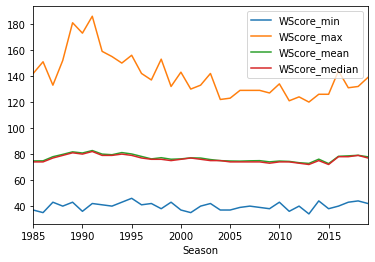

In [26]:
summaries[[col for col in summaries.columns if 'WScore' in col and 'sum' not in col]].plot()

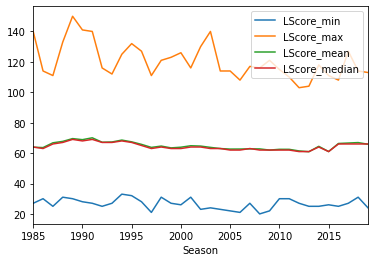

In [27]:
summaries[[col for col in summaries.columns if 'LScore' in col and 'sum' not in col]].plot()

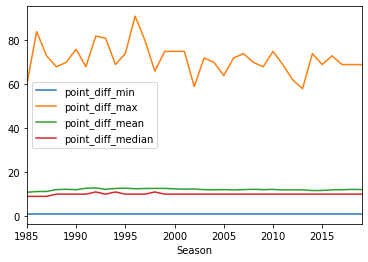

In [28]:
summaries[[col for col in summaries.columns if 'point_diff' in col and 'sum' not in col]].plot()

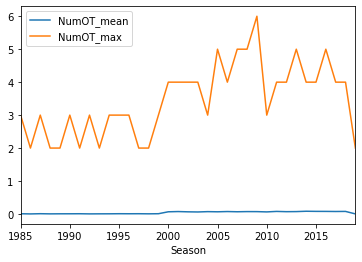

In [29]:
summaries[['NumOT_mean', 'NumOT_max']].plot()

In [30]:
summaries = df[['Season', 'WLoc',
    'WScore', 
    'LScore', 
    'NumOT', 
    'point_diff']].groupby(['Season', 'WLoc']).agg(['min', 'max', 'mean', 'median', 'count'])

summaries.columns = ['_'.join(col).strip() for col in summaries.columns.values]
summaries

WScore_min  WScore_max  WScore_mean  WScore_median  WScore_count  \
Season WLoc                                                                     
1985   A             41         142    72.491023             72          1114   
       H             37         128    75.935383             75          2244   
       N             43         121    74.105541             74           379   
1986   A             35         126    72.163964             72          1110   
       H             42         151    76.169076             76          2283   
...                 ...         ...          ...            ...           ...   
2018   H             47         132    79.998109             80          3173   
       N             44         116    77.362460             77           618   
2019   A             47         116    76.432574             76          1713   
       H             42         139    78.884750             78          3141   
       N             50         118    76.835796             77           609   

             LScore_min  LScore_max  LScore_mean  LScore_median  LScore_count  \
Season WLoc                                                                     
1985   A             35         140    63.952424           63.0          1114   
       H             27         105    63.839127           64.0          2244   
       N             37          96    63.715040           64.0           379   
1986   A             30          97    63.426126           63.0          1110   
       H             31         114    63.786684           63.0          2283   
...                 ...         ...          ...            ...           ...   
2018   H             31         113    66.271352           66.0          3173   
       N             42         109    66.796117           66.5           618   
2019   A             24         106    66.846468           66.0          1713   
       H             33         113    65.209806           65.0          3141   
       N             38         107    65.816092           66.0           609   

             NumOT_min  NumOT_max  NumOT_mean  NumOT_median  NumOT_count  \
Season WLoc                                                                
1985   A             0          3    0.007181             0         1114   
       H             0          1    0.002228             0         2244   
       N             0          3    0.042216             0          379   
1986   A             0          2    0.001802             0         1110   
       H             0          1    0.001752             0         2283   
...                ...        ...         ...           ...          ...   
2018   H             0          3    0.070596             0         3173   
       N             0          4    0.063107             0          618   
2019   A             0          0    0.000000             0         1713   
       H             0          2    0.000955             0         3141   
       N             0          1    0.018062             0          609   

             point_diff_min  point_diff_max  point_diff_mean  \
Season WLoc                                                    
1985   A                  1              43         8.538600   
       H                  1              60        12.096257   
       N                  1              47        10.390501   
1986   A                  1              53         8.737838   
       H                  1              53        12.382392   
...                     ...             ...              ...   
2018   H                  1              69        13.726757   
       N                  1              47        10.566343   
2019   A                  1              59         9.586106   
       H                  1              69        13.674944   
       N                  1              39        11.019704   

             point_diff_median  point_diff_count  
Season WLoc                     

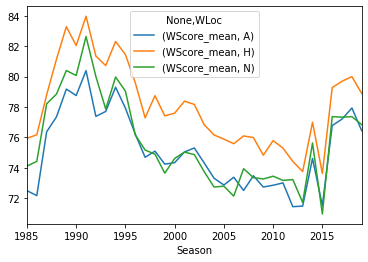

In [31]:
summaries[['WScore_mean']].unstack().plot()

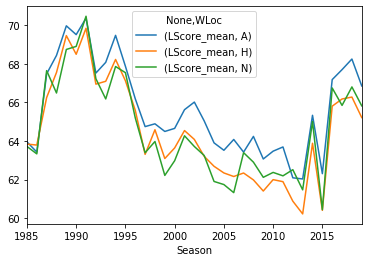

In [32]:
summaries[['LScore_mean']].unstack().plot()

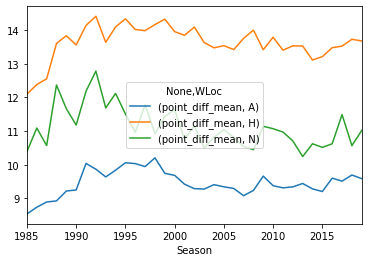

In [33]:
summaries[['point_diff_mean']].unstack().plot()

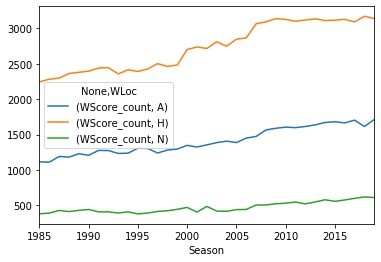

In [34]:
summaries[['WScore_count']].unstack().plot()

# Playoff compact results

In [35]:
[file for file in men_comp if 'NCAATourneyCompact' in file]

['data/raw_men/Stage2DataFiles/NCAATourneyCompactResults.csv',
 'data/raw_men/DataFiles/NCAATourneyCompactResults.csv']

In [36]:
df = pd.read_csv('data/raw_men/Stage2DataFiles/NCAATourneyCompactResults.csv')
print(df.shape)
df.head()

(2184, 8)


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,136,1116,63,1234,54,N,0
1,1985,136,1120,59,1345,58,N,0
2,1985,136,1207,68,1250,43,N,0
3,1985,136,1229,58,1425,55,N,0
4,1985,136,1242,49,1325,38,N,0


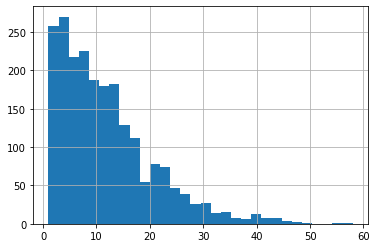

In [37]:
df['point_diff'] = df.WScore - df.LScore
df.point_diff.hist(bins=30)

In [38]:
summaries = df[['Season', 
    'WScore', 
    'LScore', 
    'NumOT', 
    'point_diff']].groupby('Season').agg(['min', 'max', 'mean', 'median'])

summaries.columns = ['_'.join(col).strip() for col in summaries.columns.values]
summaries

,WScore_min,WScore_max,WScore_mean,WScore_median,LScore_min,LScore_max,LScore_mean,LScore_median,NumOT_min,NumOT_max,NumOT_mean,NumOT_median,point_diff_min,point_diff_max,point_diff_mean,point_diff_median
Season,,,,,,,,,,,,,,,,
1985,46,96,68.047619,67.0,38,84,59.333333,58.0,0,1,0.047619,0,1,25,8.714286,7.0
1986,58,101,76.841270,74.0,43,87,66.142857,65.0,0,1,0.079365,0,1,49,10.698413,8.0
1987,57,113,82.603175,83.0,51,97,71.984127,71.0,0,1,0.079365,0,1,34,10.619048,8.0
1988,54,123,83.349206,83.0,47,115,71.285714,72.0,0,1,0.031746,0,1,40,12.063492,10.0
1989,50,124,85.222222,85.0,46,101,73.253968,73.0,0,1,0.047619,0,1,43,11.968254,11.0
1990,49,149,80.761905,78.0,46,115,70.761905,70.0,0,1,0.079365,0,1,35,10.000000,7.0
1991,50,117,80.079365,79.0,48,90,67.809524,68.0,0,1,0.063492,0,1,41,12.269841,10.0
1992,51,106,81.238095,81.0,43,103,68.730159,69.0,0,1,0.063492,0,1,39,12.507937,10.0
1993,54,112,81.761905,81.0,50,84,66.841270,68.0,0,1,0.063492,0,2,45,14.920635,13.0


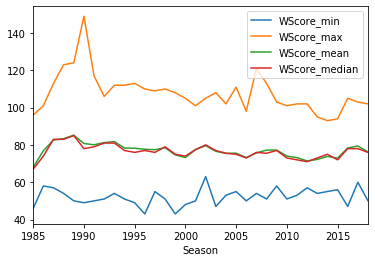

In [39]:
summaries[[col for col in summaries.columns if 'WScore' in col and 'sum' not in col]].plot()

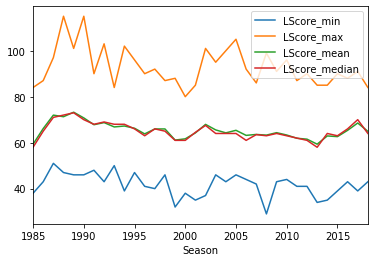

In [40]:
summaries[[col for col in summaries.columns if 'LScore' in col and 'sum' not in col]].plot()

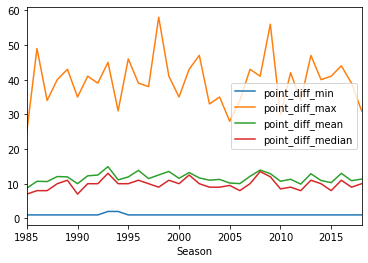

In [41]:
summaries[[col for col in summaries.columns if 'point_diff' in col and 'sum' not in col]].plot()

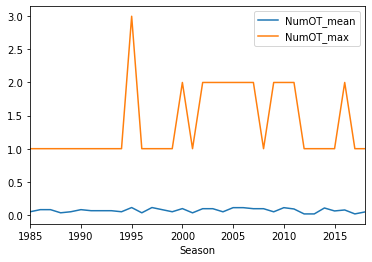

In [42]:
summaries[['NumOT_mean', 'NumOT_max']].plot()

In [43]:
df.WLoc.value_counts()

N    2184
Name: WLoc, dtype: int64

# Detailed results

In [44]:
[col for col in men_comp if 'Detailed' in col]

['data/raw_men/Stage2DataFiles/NCAATourneyDetailedResults.csv',
 'data/raw_men/Stage2DataFiles/RegularSeasonDetailedResults.csv',
 'data/raw_men/DataFiles/NCAATourneyDetailedResults.csv',
 'data/raw_men/DataFiles/RegularSeasonDetailedResults.csv']

In [45]:
reg_season = pd.read_csv('data/raw_men/Stage2DataFiles/RegularSeasonDetailedResults.csv')
print(df.shape)
stats = [col for col in reg_season.columns if 'W' in col and 'ID' not in col and 'Loc' not in col]

reg_season = process_details(reg_season)

reg_season.head()

(2184, 9)


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,WFG_perc,WFGM2,WFGA2,WFG2_perc,WFG3_perc,WFT_perc,WTot_Reb,WFGM_no_ast,WFGM_no_ast_perc,Wpossessions,Woff_rating,Wscoring_opp,WTO_perposs,LFG_perc,LFGM2,LFGA2,LFG2_perc,LFG3_perc,LFT_perc,LTot_Reb,LFGM_no_ast,LFGM_no_ast_perc,Lpossessions,Loff_rating,Lscoring_opp,LTO_perposs,Wdef_rating,Ldef_rating,Wimpact,Limpact,WDef_effort,LDef_effort,WReb_opp,LReb_opp,Score_diff,FGM_diff,FGA_diff,FGM3_diff,FGA3_diff,FTM_diff,FTA_diff,OR_diff,DR_diff,Ast_diff,TO_diff,Stl_diff,Blk_diff,PF_diff,FGM2_diff,FGA2_diff,Tot_Reb_diff,FGM_no_ast_diff,Def_effort_diff,Reb_opp_diff,possessions_diff,off_rating_diff,def_rating_diff,scoring_opp_diff,TO_perposs_diff,impact_diff
0,2003,10,1104,68,1328,62,N,0,27,58,3,14,11,18,14,24,13,23,7,1,22,22,53,2,10,16,22,10,22,8,18,9,2,20,0.465517,24,44,0.545455,0.214286,0.611111,38,14,0.518519,58.450,116.338751,1.138580,0.393499,0.415094,20,43,0.465116,0.200000,0.727273,32,14,0.636364,50.550,122.650841,1.255193,0.356083,122.650841,116.338751,0.543379,0.456621,80.264151,70.965517,0.774194,0.709677,6,5,5,1,4,-5,-4,4,2,5,5,-2,-1,2,4,1,6,0,9.298634,0.064516,7.900,-6.312090,6.312090,-0.116613,0.037416,0.086758
1,2003,10,1272,70,1393,63,N,0,26,62,8,20,10,19,15,28,16,13,4,4,18,24,67,6,24,9,20,20,25,7,12,8,6,16,0.419355,18,42,0.428571,0.400000,0.526316,43,10,0.384615,50.975,137.322217,1.393330,0.255027,0.358209,18,43,0.418605,0.250000,0.450000,45,17,0.708333,49.500,127.272727,1.545455,0.242424,127.272727,137.322217,0.583710,0.416290,95.000000,83.290323,0.651163,0.694444,7,2,-5,2,-4,1,-1,-5,3,9,1,-4,-2,2,0,-1,-2,-7,11.709677,-0.043282,1.475,10.049490,-10.049490,-0.152124,0.012603,0.167421
2,2003,11,1266,73,1437,61,N,0,24,58,8,18,17,29,17,26,15,10,5,2,25,22,73,3,26,14,23,31,22,9,12,2,5,23,0.413793,16,40,0.400000,0.444444,0.586207,43,9,0.375000,37.225,196.104768,1.928140,0.268637,0.301370,19,47,0.404255,0.115385,0.608696,53,13,0.590909,43.075,141.613465,1.948346,0.278584,141.613465,196.104768,0.664740,0.335260,92.150685,88.724138,0.509804,0.647059,12,2,-15,5,-8,3,6,-14,4,6,-2,3,-3,2,-3,-7,-10,-4,3.426547,-0.137255,-5.850,54.491303,-54.491303,-0.020206,-0.009947,0.329480
3,2003,11,1296,56,1457,50,N,0,18,38,3,9,17,31,6,19,11,12,14,2,18,18,49,6,22,8,15,17,20,9,19,4,3,23,0.473684,15,29,0.517241,0.333333,0.548387,25,7,0.388889,29.275,191.289496,1.801025,0.409906,0.367347,12,27,0.444444,0.272727,0.533333,37,9,0.500000,43.875,113.960114,1.279202,0.433048,113.960114,191.289496,0.619048,0.380952,65.102041,84.921053,0.612903,1.000000,6,0,-11,-3,-13,9,16,-11,-1,2,-7,10,-1,-5,3,2,-12,-2,-19.819012,-0.387097,-14.600,77.329382,-77.329382,0.521822,-0.023142,0.238095
4,2003,11,1400,77,1208,71,N,0,30,61,6,14,11,13,17,22,12,14,4,4,20,24,62,6,16,17,27,21,15,12,10,7,1,14,0.491803,24,47,0.510638,0.428571,0.846154,39,18,0.600000,51.825,148.576942,1.296189,0.270140,0.387097,18,46,0.391304,0.375000,0.629630,36,12,0.500000,38.175,185.985593,1.960052,0.261952,185.985593,148.576942,0.573123,0.426877,82.548387,50.081967,0.578947,0.483871,6,6,-1,0,-2,-6,-14,-4,7,0,4,-3,3,6,6,1,3,6,32.466420,0.095076,13.650,-37.408651,37.408651,-0.663863,0.008188,0.146245


In [46]:
not_sum = ['WTeamID', 'DayNum', 'LTeamID']
to_sum = [col for col in reg_season.columns if col not in not_sum]

summaries = reg_season[to_sum].groupby(['Season', 'WLoc']).agg(['min', 'max', 'mean', 'median', 'count'])

summaries.columns = ['_'.join(col).strip() for col in summaries.columns.values]
summaries.sample(5)

,,WScore_min,WScore_max,WScore_mean,WScore_median,WScore_count,LScore_min,LScore_max,LScore_mean,LScore_median,LScore_count,NumOT_min,NumOT_max,NumOT_mean,NumOT_median,NumOT_count,WFGM_min,WFGM_max,WFGM_mean,WFGM_median,WFGM_count,WFGA_min,WFGA_max,WFGA_mean,WFGA_median,WFGA_count,WFGM3_min,WFGM3_max,WFGM3_mean,WFGM3_median,WFGM3_count,WFGA3_min,WFGA3_max,WFGA3_mean,WFGA3_median,WFGA3_count,WFTM_min,WFTM_max,WFTM_mean,WFTM_median,WFTM_count,WFTA_min,WFTA_max,WFTA_mean,WFTA_median,WFTA_count,WOR_min,WOR_max,WOR_mean,WOR_median,WOR_count,WDR_min,WDR_max,WDR_mean,WDR_median,WDR_count,WAst_min,WAst_max,WAst_mean,WAst_median,WAst_count,WTO_min,WTO_max,WTO_mean,WTO_median,WTO_count,WStl_min,WStl_max,WStl_mean,WStl_median,WStl_count,WBlk_min,WBlk_max,WBlk_mean,WBlk_median,WBlk_count,WPF_min,WPF_max,WPF_mean,WPF_median,WPF_count,LFGM_min,LFGM_max,LFGM_mean,LFGM_median,LFGM_count,LFGA_min,LFGA_max,LFGA_mean,LFGA_median,LFGA_count,LFGM3_min,LFGM3_max,LFGM3_mean,LFGM3_median,LFGM3_count,LFGA3_min,LFGA3_max,LFGA3_mean,LFGA3_median,LFGA3_count,LFTM_min,LFTM_max,LFTM_mean,LFTM_median,LFTM_count,LFTA_min,LFTA_max,LFTA_mean,LFTA_median,LFTA_count,LOR_min,LOR_max,LOR_mean,LOR_median,LOR_count,LDR_min,LDR_max,LDR_mean,LDR_median,LDR_count,LAst_min,LAst_max,LAst_mean,LAst_median,LAst_count,LTO_min,LTO_max,LTO_mean,LTO_median,LTO_count,LStl_min,LStl_max,LStl_mean,LStl_median,LStl_count,LBlk_min,LBlk_max,LBlk_mean,LBlk_median,LBlk_count,LPF_min,LPF_max,LPF_mean,LPF_median,LPF_count,WFG_perc_min,WFG_perc_max,WFG_perc_mean,WFG_perc_median,WFG_perc_count,...,WDef_effort_min,WDef_effort_max,WDef_effort_mean,WDef_effort_median,WDef_effort_count,LDef_effort_min,LDef_effort_max,LDef_effort_mean,LDef_effort_median,LDef_effort_count,WReb_opp_min,WReb_opp_max,WReb_opp_mean,WReb_opp_median,WReb_opp_count,LReb_opp_min,LReb_opp_max,LReb_opp_mean,LReb_opp_median,LReb_opp_count,Score_diff_min,Score_diff_max,Score_diff_mean,Score_diff_median,Score_diff_count,FGM_diff_min,FGM_diff_max,FGM_diff_mean,FGM_diff_median,FGM_diff_count,FGA_diff_min,FGA_diff_max,FGA_diff_mean,FGA_diff_median,FGA_diff_count,FGM3_diff_min,FGM3_diff_max,FGM3_diff_mean,FGM3_diff_median,FGM3_diff_count,FGA3_diff_min,FGA3_diff_max,FGA3_diff_mean,FGA3_diff_median,FGA3_diff_count,FTM_diff_min,FTM_diff_max,FTM_diff_mean,FTM_diff_median,FTM_diff_count,FTA_diff_min,FTA_diff_max,FTA_diff_mean,FTA_diff_median,FTA_diff_count,OR_diff_min,OR_diff_max,OR_diff_mean,OR_diff_median,OR_diff_count,DR_diff_min,DR_diff_max,DR_diff_mean,DR_diff_median,DR_diff_count,Ast_diff_min,Ast_diff_max,Ast_diff_mean,Ast_diff_median,Ast_diff_count,TO_diff_min,TO_diff_max,TO_diff_mean,TO_diff_median,TO_diff_count,Stl_diff_min,Stl_diff_max,Stl_diff_mean,Stl_diff_median,Stl_diff_count,Blk_diff_min,Blk_diff_max,Blk_diff_mean,Blk_diff_median,Blk_diff_count,PF_diff_min,PF_diff_max,PF_diff_mean,PF_diff_median,PF_diff_count,FGM2_diff_min,FGM2_diff_max,FGM2_diff_mean,FGM2_diff_median,FGM2_diff_count,FGA2_diff_min,FGA2_diff_max,FGA2_diff_mean,FGA2_diff_median,FGA2_diff_count,Tot_Reb_diff_min,Tot_Reb_diff_max,Tot_Reb_diff_mean,Tot_Reb_diff_median,Tot_Reb_diff_count,FGM_no_ast_diff_min,FGM_no_ast_diff_max,FGM_no_ast_diff_mean,FGM_no_ast_diff_median,FGM_no_ast_diff_count,Def_effort_diff_min,Def_effort_diff_max,Def_effort_diff_mean,Def_effort_diff_median,Def_effort_diff_count,Reb_opp_diff_min,Reb_opp_diff_max,Reb_opp_diff_mean,Reb_opp_diff_median,Reb_opp_diff_count,possessions_diff_min,possessions_diff_max,possessions_diff_mean,possessions_diff_median,possessions_diff_count,off_rating_diff_min,off_rating_diff_max,off_rating_diff_mean,off_rating_diff_median,off_rating_diff_count,def_rating_diff_min,def_rating_diff_max,def_rating_diff_mean,def_rating_diff_median,def_rating_diff_count,scoring_opp_diff_min,scoring_opp_diff_max,scoring_opp_diff_mean,scoring_opp_diff_median,scoring_opp_diff_count,TO_perposs_diff_min,TO_perposs_diff_max,TO_perposs_diff_mean,TO_perposs_diff_median,TO_perposs_diff_count,impact_diff_min,impact_diff_max,impact_diff_m

In [47]:
[c for c in summaries.columns if ('_perc_mean' in c or '_frac_mean' in c) and c.startswith('W')]

['WFG_perc_mean',
 'WFG2_perc_mean',
 'WFG3_perc_mean',
 'WFT_perc_mean',
 'WFGM_no_ast_perc_mean']

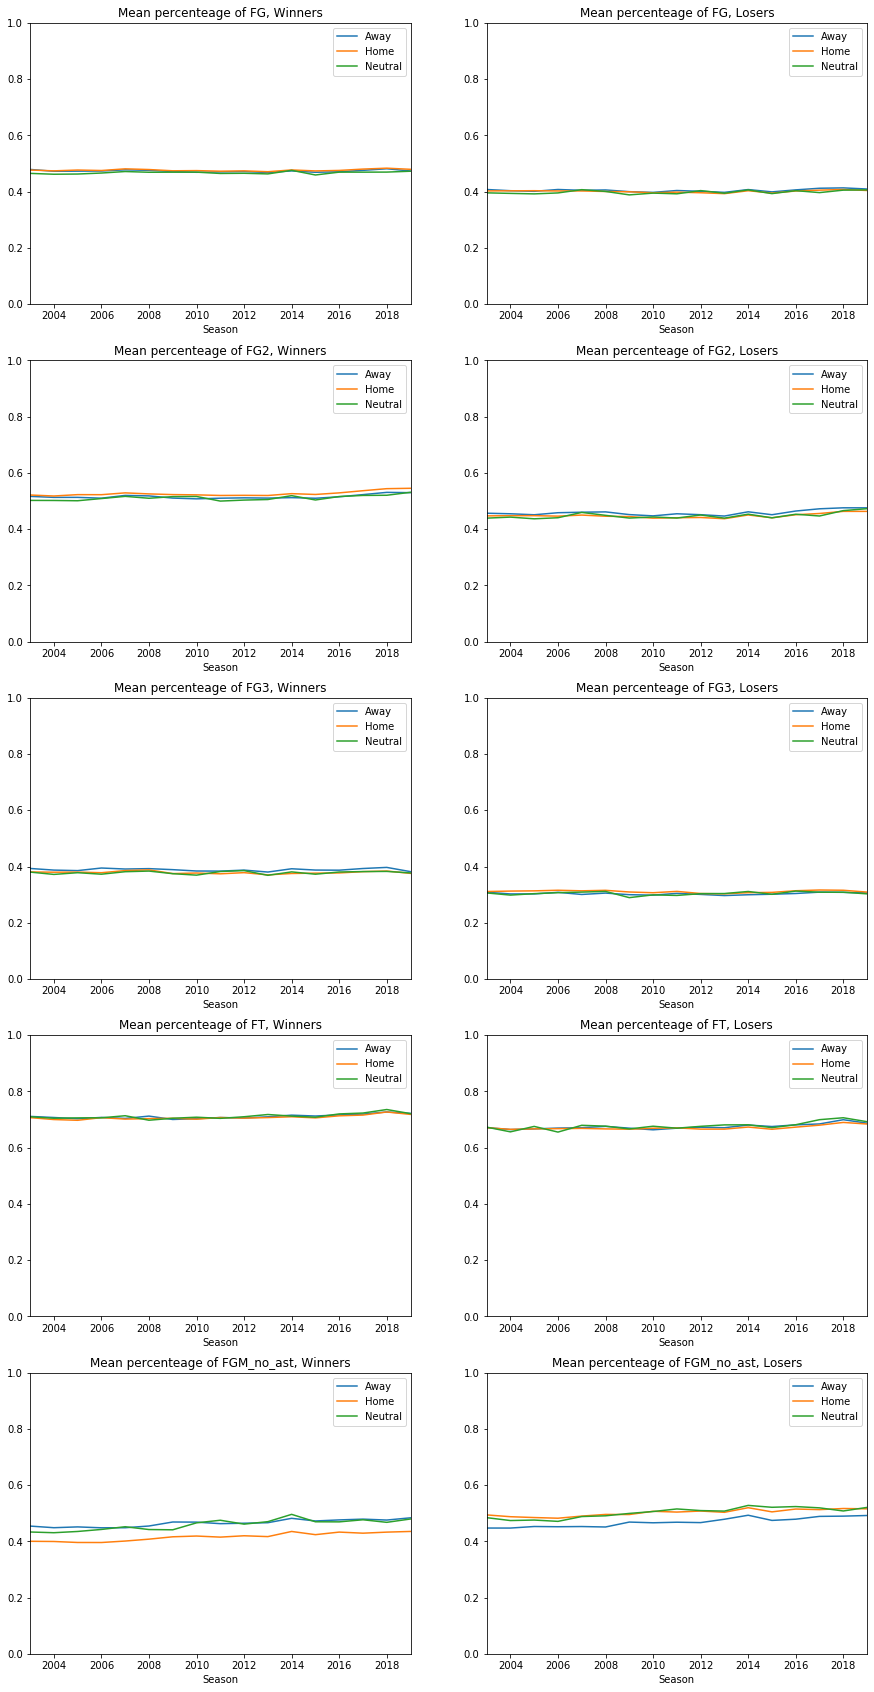

In [48]:
fig, ax= plt.subplots(5,2, figsize=(15, 6*5))

i = 0

for col in [c for c in summaries.columns if '_perc_mean' in c and c.startswith('W')]:
    name = col.split('_perc_')[0][1:]
    summaries[col].unstack().plot(title='Mean percenteage of '+name+', Winners',ax=ax[i][0])
    summaries['L'+name+'_perc_mean'].unstack().plot(title='Mean percenteage of '+name+', Losers',ax=ax[i][1])
    ax[i][0].legend(labels=['Away', 'Home', 'Neutral'])
    ax[i][1].legend(labels=['Away', 'Home', 'Neutral'])
    ax[i][0].set_ylim(0,1)
    ax[i][1].set_ylim(0,1)
    i += 1

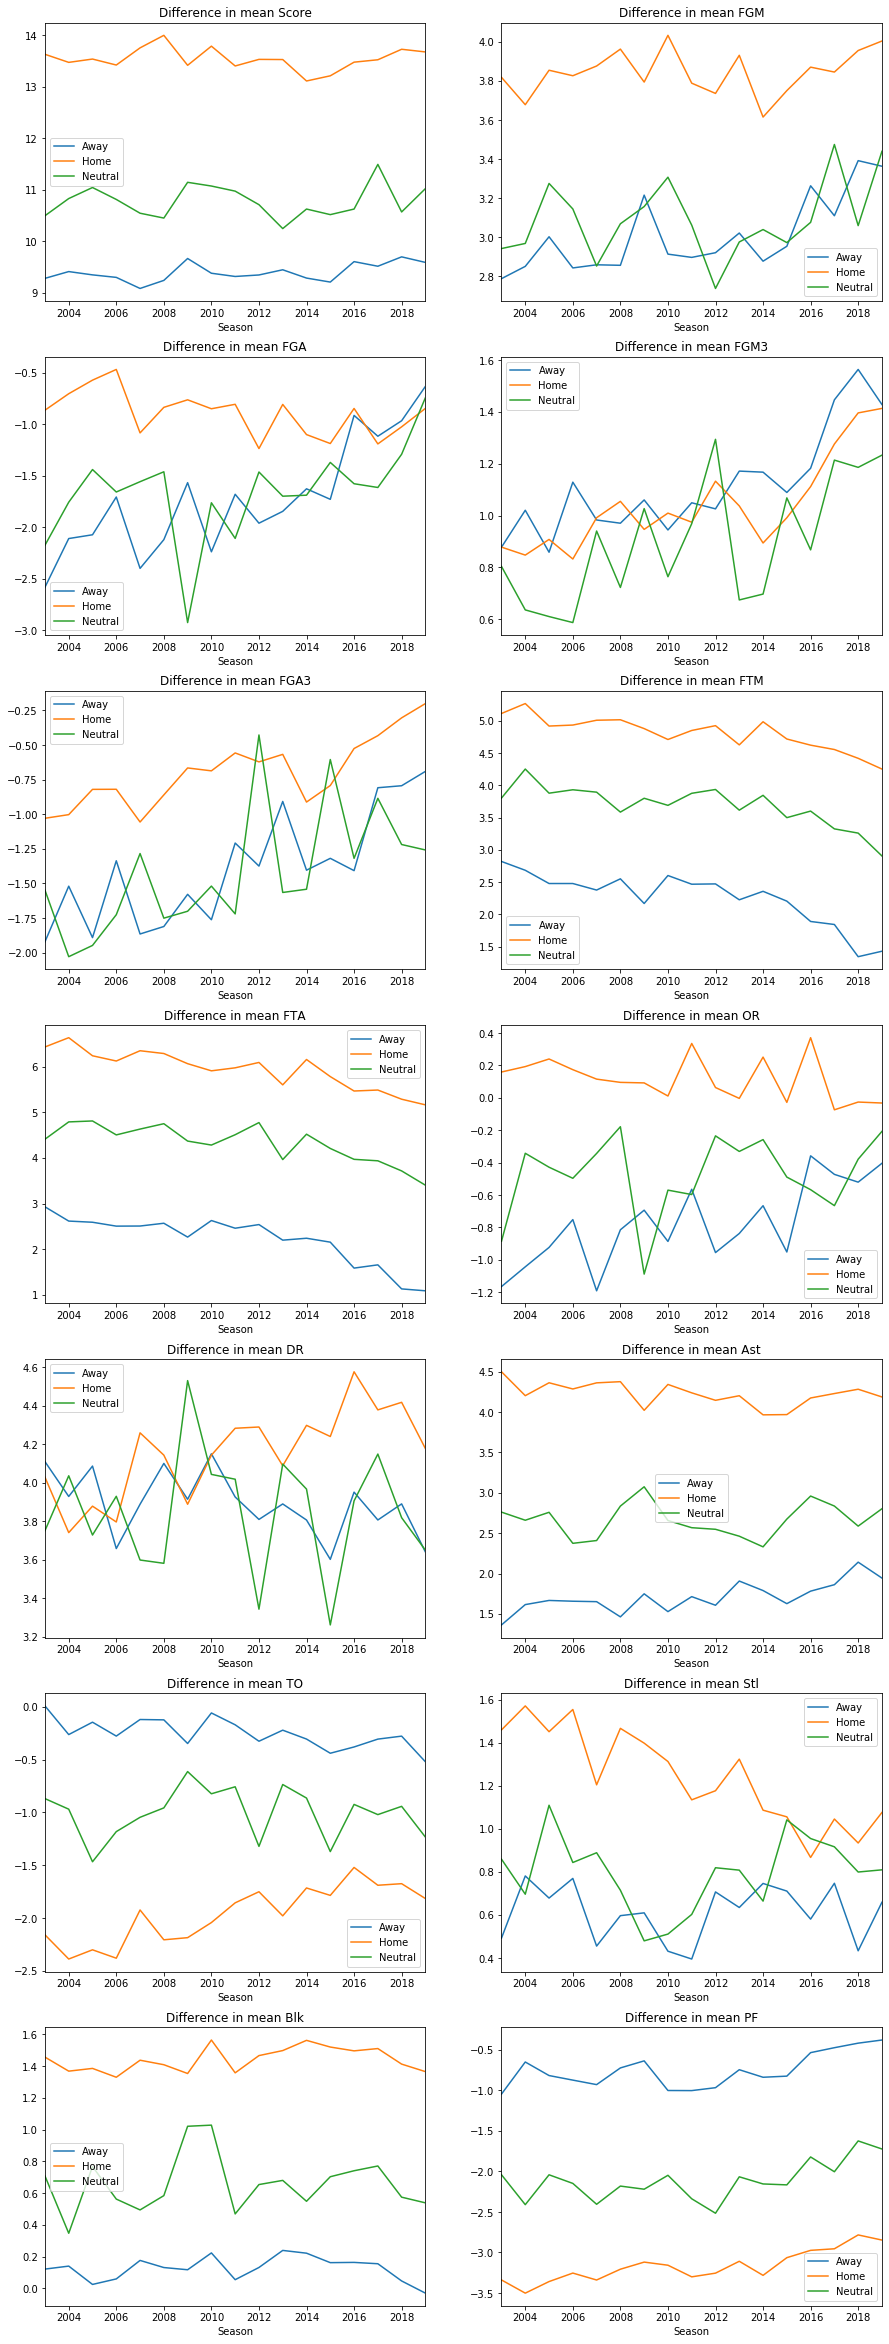

In [49]:
fig, ax= plt.subplots(7,2, figsize=(15, 6*7))

i, j = 0, 0

for col in stats:
    name = col[1:]
    summaries[[c for c in summaries.columns if name+'_diff_mean' in c]].unstack().plot(title='Difference in mean '+name,ax=ax[i][j])
    ax[i][j].legend(labels=['Away', 'Home', 'Neutral'])
    if j == 0:
        j = 1
    else:
        j = 0
        i += 1

In [51]:
playoff = pd.read_csv('data/raw_men/Stage2DataFiles/NCAATourneyDetailedResults.csv')

stats = [col for col in playoff.columns if 'W' in col and 'ID' not in col and 'Loc' not in col]

playoff= process_details(playoff)

playoff.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,WFG_perc,WFGM2,WFGA2,WFG2_perc,WFG3_perc,WFT_perc,WTot_Reb,WFGM_no_ast,WFGM_no_ast_perc,Wpossessions,Woff_rating,Wscoring_opp,WTO_perposs,LFG_perc,LFGM2,LFGA2,LFG2_perc,LFG3_perc,LFT_perc,LTot_Reb,LFGM_no_ast,LFGM_no_ast_perc,Lpossessions,Loff_rating,Lscoring_opp,LTO_perposs,Wdef_rating,Ldef_rating,Wimpact,Limpact,WDef_effort,LDef_effort,WReb_opp,LReb_opp,Score_diff,FGM_diff,FGA_diff,FGM3_diff,FGA3_diff,FTM_diff,FTA_diff,OR_diff,DR_diff,Ast_diff,TO_diff,Stl_diff,Blk_diff,PF_diff,FGM2_diff,FGA2_diff,Tot_Reb_diff,FGM_no_ast_diff,Def_effort_diff,Reb_opp_diff,possessions_diff,off_rating_diff,def_rating_diff,scoring_opp_diff,TO_perposs_diff,impact_diff
0,2003,134,1421,92,1411,84,N,1,32,69,11,29,17,26,14,30,17,12,5,3,22,29,67,12,31,14,31,17,28,16,15,5,0,22,0.463768,21,40,0.525000,0.379310,0.653846,44,15,0.468750,54.650,168.344007,1.488564,0.219579,0.432836,17,36,0.472222,0.387097,0.451613,45,13,0.448276,50.275,167.081054,1.625559,0.298359,167.081054,168.344007,0.567114,0.432886,115.477612,104.043478,0.789474,0.756757,8,3,2,-1,-2,3,-5,-3,2,1,-3,0,3,0,4,4,-1,2,11.434134,0.032717,4.375,1.262953,-1.262953,-0.136996,-0.078780,0.134228
1,2003,136,1112,80,1436,51,N,0,31,66,7,23,11,14,11,36,22,16,10,7,8,20,64,4,16,7,7,8,26,12,17,10,3,15,0.469697,24,43,0.558140,0.304348,0.785714,47,9,0.290323,64.350,124.320124,1.128982,0.248640,0.312500,16,48,0.333333,0.250000,1.000000,34,8,0.400000,69.675,73.196986,0.966272,0.243990,73.196986,124.320124,0.709265,0.290735,90.750000,82.045455,0.818182,0.742857,29,11,2,3,7,4,7,3,10,10,-1,0,4,-7,8,-5,13,1,8.704545,0.075325,-5.325,51.123138,-51.123138,0.162710,0.004650,0.418530
2,2003,136,1113,84,1272,71,N,0,31,59,6,14,16,22,10,27,18,9,7,4,19,25,69,7,28,14,21,20,22,11,12,2,5,18,0.525424,25,45,0.555556,0.428571,0.727273,37,13,0.419355,47.550,176.656151,1.460568,0.189274,0.362319,18,41,0.439024,0.250000,0.666667,42,14,0.560000,51.025,139.147477,1.547771,0.235179,139.147477,176.656151,0.645161,0.354839,97.405797,74.847458,0.613636,0.785714,13,6,-10,-1,-14,2,1,-10,5,7,-3,5,-1,1,7,4,-5,-1,22.558339,-0.172078,-3.475,37.508675,-37.508675,-0.087203,-0.045904,0.290323
3,2003,136,1141,79,1166,73,N,0,29,53,3,7,18,25,11,20,15,18,13,1,19,27,60,7,17,12,17,14,17,20,21,6,6,21,0.547170,26,46,0.565217,0.428571,0.720000,31,14,0.482759,48.125,164.155844,1.348052,0.374026,0.450000,20,43,0.465116,0.411765,0.705882,31,7,0.259259,58.925,123.886296,1.155282,0.356385,123.886296,164.155844,0.553333,0.446667,70.850000,63.849057,0.606061,0.708333,6,2,-7,-4,-10,6,8,-3,3,-5,-3,7,-5,-2,6,3,0,7,7.000943,-0.102273,-10.800,40.269548,-40.269548,0.192770,0.017641,0.106667
4,2003,136,1143,76,1301,74,N,1,27,64,7,20,15,23,18,20,17,13,8,2,14,25,56,9,21,15,20,10,26,16,14,5,8,19,0.421875,20,44,0.454545,0.350000,0.652174,38,10,0.370370,48.075,158.086323,1.558502,0.270411,0.446429,16,35,0.457143,0.428571,0.750000,36,9,0.360000,50.500,146.534653,1.297030,0.277228,146.534653,158.086323,0.489796,0.510204,82.750000,83.562500,0.645161,0.702703,2,2,8,-2,-1,0,3,8,-6,1,-1,3,-6,-5,4,9,2,1,-0.812500,-0.057541,-2.425,11.551670,-11.551670,0.261473,-0.006817,-0.020408


In [52]:
not_sum = ['WTeamID', 'DayNum', 'LTeamID']
to_sum = [col for col in playoff.columns if col not in not_sum]

summaries = playoff[to_sum].groupby(['Season']).agg(['min', 'max', 'mean', 'median', 'count'])

summaries.columns = ['_'.join(col).strip() for col in summaries.columns.values]
summaries

,WScore_min,WScore_max,WScore_mean,WScore_median,WScore_count,LScore_min,LScore_max,LScore_mean,LScore_median,LScore_count,NumOT_min,NumOT_max,NumOT_mean,NumOT_median,NumOT_count,WFGM_min,WFGM_max,WFGM_mean,WFGM_median,WFGM_count,WFGA_min,WFGA_max,WFGA_mean,WFGA_median,WFGA_count,WFGM3_min,WFGM3_max,WFGM3_mean,WFGM3_median,WFGM3_count,WFGA3_min,WFGA3_max,WFGA3_mean,WFGA3_median,WFGA3_count,WFTM_min,WFTM_max,WFTM_mean,WFTM_median,WFTM_count,WFTA_min,WFTA_max,WFTA_mean,WFTA_median,WFTA_count,WOR_min,WOR_max,WOR_mean,WOR_median,WOR_count,WDR_min,WDR_max,WDR_mean,WDR_median,WDR_count,WAst_min,WAst_max,WAst_mean,WAst_median,WAst_count,WTO_min,WTO_max,WTO_mean,WTO_median,WTO_count,WStl_min,WStl_max,WStl_mean,WStl_median,WStl_count,WBlk_min,WBlk_max,WBlk_mean,WBlk_median,WBlk_count,WPF_min,WPF_max,WPF_mean,WPF_median,WPF_count,LFGM_min,LFGM_max,LFGM_mean,LFGM_median,LFGM_count,LFGA_min,LFGA_max,LFGA_mean,LFGA_median,LFGA_count,LFGM3_min,LFGM3_max,LFGM3_mean,LFGM3_median,LFGM3_count,LFGA3_min,LFGA3_max,LFGA3_mean,LFGA3_median,LFGA3_count,LFTM_min,LFTM_max,LFTM_mean,LFTM_median,LFTM_count,LFTA_min,LFTA_max,LFTA_mean,LFTA_median,LFTA_count,LOR_min,LOR_max,LOR_mean,LOR_median,LOR_count,LDR_min,LDR_max,LDR_mean,LDR_median,LDR_count,LAst_min,LAst_max,LAst_mean,LAst_median,LAst_count,LTO_min,LTO_max,LTO_mean,LTO_median,LTO_count,LStl_min,LStl_max,LStl_mean,LStl_median,LStl_count,LBlk_min,LBlk_max,LBlk_mean,LBlk_median,LBlk_count,LPF_min,LPF_max,LPF_mean,LPF_median,LPF_count,WFG_perc_min,WFG_perc_max,WFG_perc_mean,WFG_perc_median,WFG_perc_count,...,WDef_effort_min,WDef_effort_max,WDef_effort_mean,WDef_effort_median,WDef_effort_count,LDef_effort_min,LDef_effort_max,LDef_effort_mean,LDef_effort_median,LDef_effort_count,WReb_opp_min,WReb_opp_max,WReb_opp_mean,WReb_opp_median,WReb_opp_count,LReb_opp_min,LReb_opp_max,LReb_opp_mean,LReb_opp_median,LReb_opp_count,Score_diff_min,Score_diff_max,Score_diff_mean,Score_diff_median,Score_diff_count,FGM_diff_min,FGM_diff_max,FGM_diff_mean,FGM_diff_median,FGM_diff_count,FGA_diff_min,FGA_diff_max,FGA_diff_mean,FGA_diff_median,FGA_diff_count,FGM3_diff_min,FGM3_diff_max,FGM3_diff_mean,FGM3_diff_median,FGM3_diff_count,FGA3_diff_min,FGA3_diff_max,FGA3_diff_mean,FGA3_diff_median,FGA3_diff_count,FTM_diff_min,FTM_diff_max,FTM_diff_mean,FTM_diff_median,FTM_diff_count,FTA_diff_min,FTA_diff_max,FTA_diff_mean,FTA_diff_median,FTA_diff_count,OR_diff_min,OR_diff_max,OR_diff_mean,OR_diff_median,OR_diff_count,DR_diff_min,DR_diff_max,DR_diff_mean,DR_diff_median,DR_diff_count,Ast_diff_min,Ast_diff_max,Ast_diff_mean,Ast_diff_median,Ast_diff_count,TO_diff_min,TO_diff_max,TO_diff_mean,TO_diff_median,TO_diff_count,Stl_diff_min,Stl_diff_max,Stl_diff_mean,Stl_diff_median,Stl_diff_count,Blk_diff_min,Blk_diff_max,Blk_diff_mean,Blk_diff_median,Blk_diff_count,PF_diff_min,PF_diff_max,PF_diff_mean,PF_diff_median,PF_diff_count,FGM2_diff_min,FGM2_diff_max,FGM2_diff_mean,FGM2_diff_median,FGM2_diff_count,FGA2_diff_min,FGA2_diff_max,FGA2_diff_mean,FGA2_diff_median,FGA2_diff_count,Tot_Reb_diff_min,Tot_Reb_diff_max,Tot_Reb_diff_mean,Tot_Reb_diff_median,Tot_Reb_diff_count,FGM_no_ast_diff_min,FGM_no_ast_diff_max,FGM_no_ast_diff_mean,FGM_no_ast_diff_median,FGM_no_ast_diff_count,Def_effort_diff_min,Def_effort_diff_max,Def_effort_diff_mean,Def_effort_diff_median,Def_effort_diff_count,Reb_opp_diff_min,Reb_opp_diff_max,Reb_opp_diff_mean,Reb_opp_diff_median,Reb_opp_diff_count,possessions_diff_min,possessions_diff_max,possessions_diff_mean,possessions_diff_median,possessions_diff_count,off_rating_diff_min,off_rating_diff_max,off_rating_diff_mean,off_rating_diff_median,off_rating_diff_count,def_rating_diff_min,def_rating_diff_max,def_rating_diff_mean,def_rating_diff_median,def_rating_diff_count,scoring_opp_diff_min,scoring_opp_diff_max,scoring_opp_diff_mean,scoring_opp_diff_median,scoring_opp_diff_count,TO_perposs_diff_min,TO_perposs_diff_max,TO_perposs_diff_mean,TO_perposs_diff_median,TO_perposs_diff_count,impact_diff_min,impact_diff_max,impact_diff_me

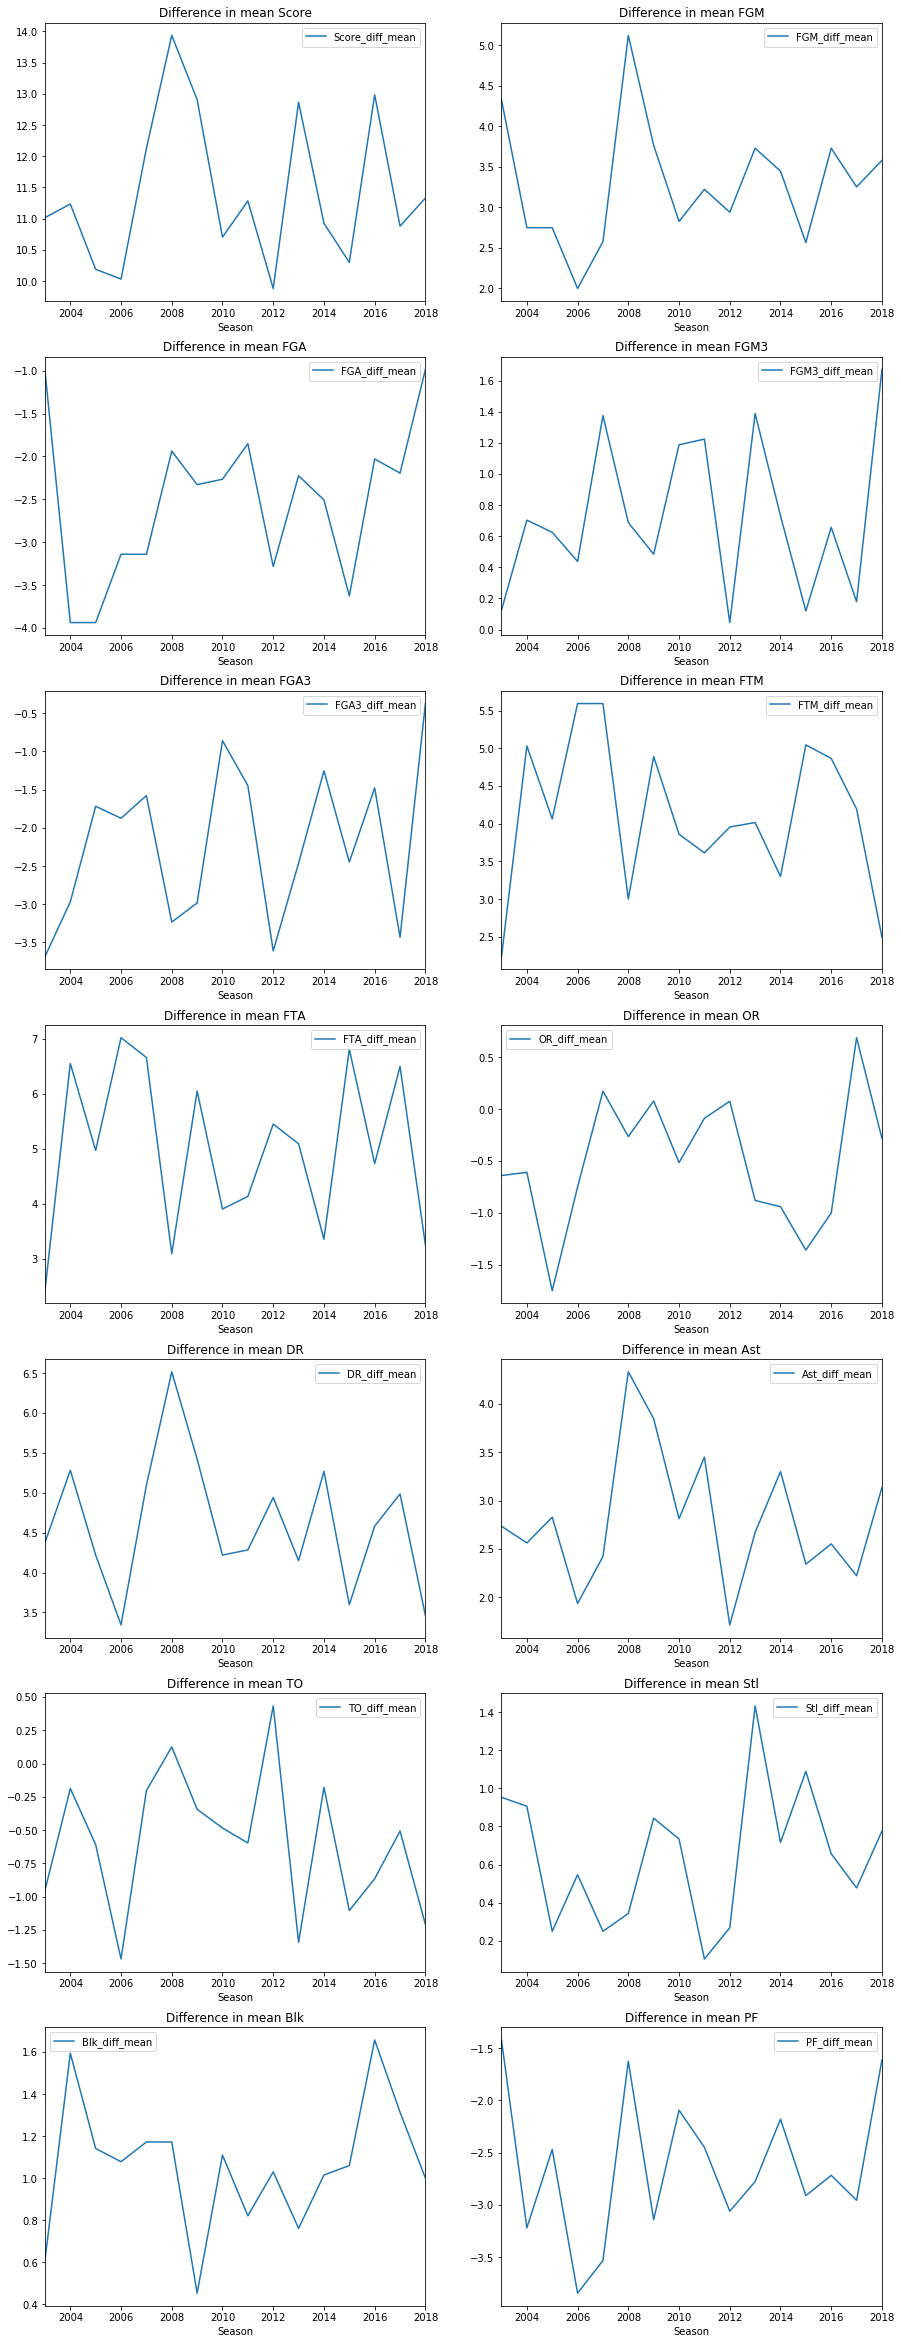

In [54]:
fig, ax= plt.subplots(7,2, figsize=(15, 6*7))

i, j = 0, 0

for col in stats:
    name = col[1:]
    summaries[[c for c in summaries.columns if name+'_diff_mean' in c]].plot(title='Difference in mean '+name,ax=ax[i][j])
    if j == 0:
        j = 1
    else:
        j = 0
        i += 1

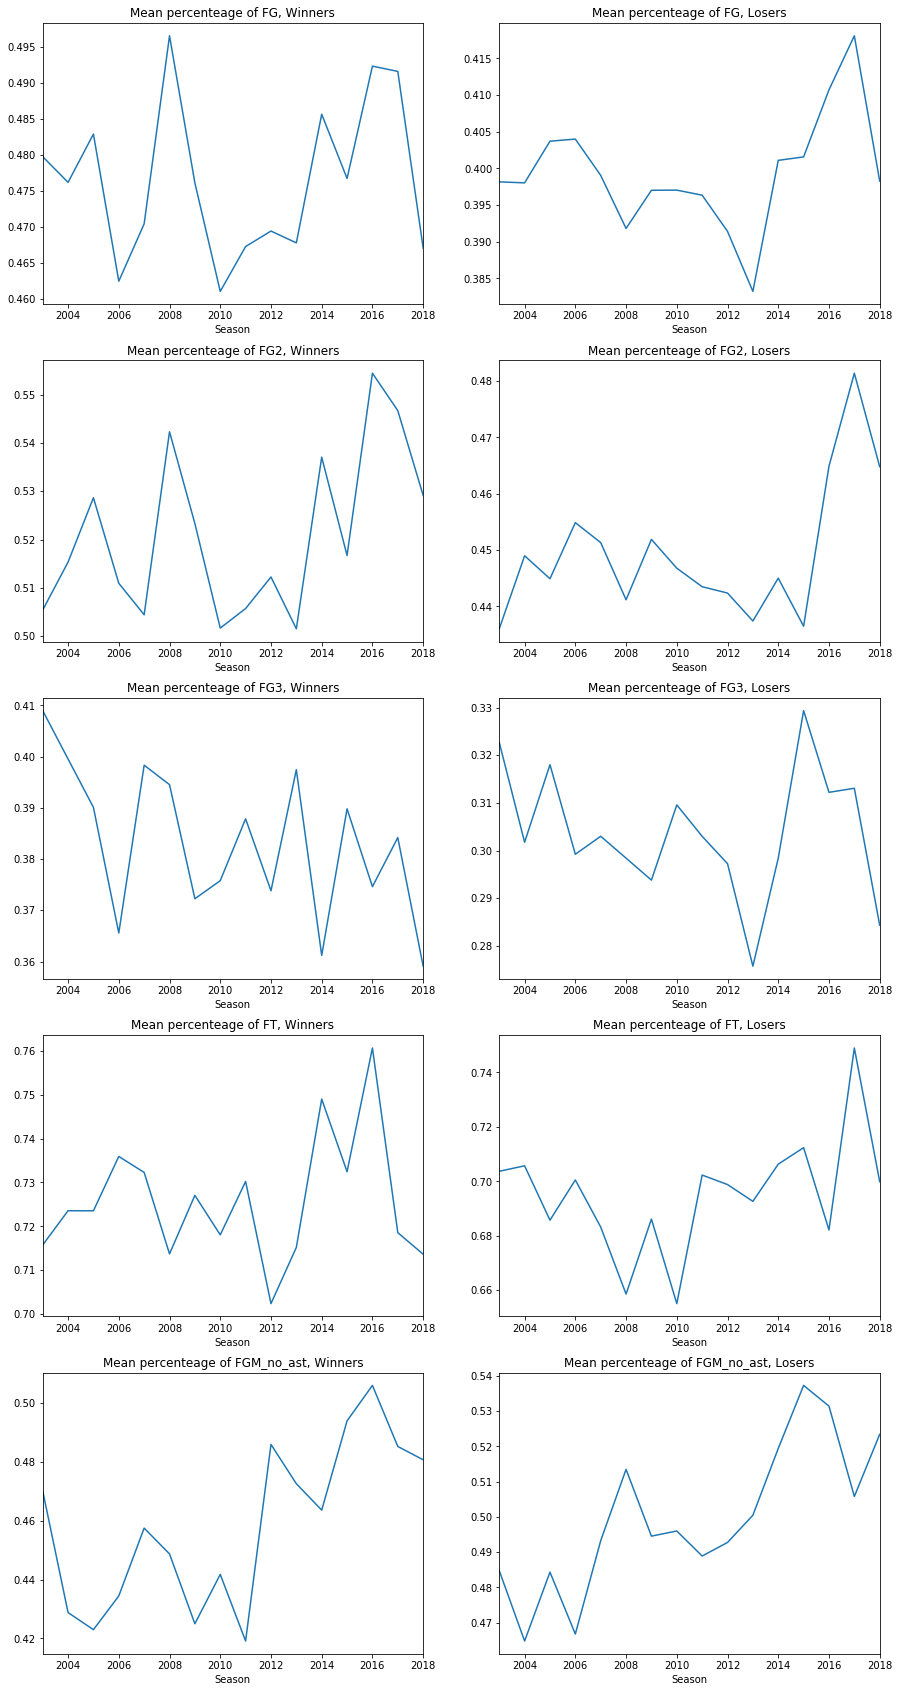

In [57]:
fig, ax= plt.subplots(5,2, figsize=(15, 6*5))

i = 0

for col in [c for c in summaries.columns if '_perc_mean' in c and c.startswith('W')]:
    name = col.split('_perc_')[0][1:]
    summaries[col].plot(title='Mean percenteage of '+name+', Winners',ax=ax[i][0])
    summaries['L'+name+'_perc_mean'].plot(title='Mean percenteage of '+name+', Losers',ax=ax[i][1])
    i += 1

# Seeds

In [58]:
[col for col in men_comp if 'Seed' in col]

['data/raw_men/Stage2DataFiles/NCAATourneySeedRoundSlots.csv',
 'data/raw_men/Stage2DataFiles/NCAATourneySeeds.csv',
 'data/raw_men/DataFiles/NCAATourneySeedRoundSlots.csv',
 'data/raw_men/DataFiles/NCAATourneySeeds.csv']

In [59]:
seeds = pd.read_csv('data/raw_men/Stage2DataFiles/NCAATourneySeeds.csv')
seeds.head()

,Season,Seed,TeamID
0,1985,W01,1207
1,1985,W02,1210
2,1985,W03,1228
3,1985,W04,1260
4,1985,W05,1374


In [60]:
slots = pd.read_csv('data/raw_men/Stage2DataFiles/NCAATourneySeedRoundSlots.csv')
slots.head()

,Seed,GameRound,GameSlot,EarlyDayNum,LateDayNum
0,W01,1,R1W1,136,137
1,W01,2,R2W1,138,139
2,W01,3,R3W1,143,144
3,W01,4,R4W1,145,146
4,W01,5,R5WX,152,152


# Rankings

In [61]:
[col for col in men_comp if 'Mass' in col]

['data/raw_men/MasseyOrdinals/MasseyOrdinals.csv',
 'data/raw_men/MasseyOrdinals_thru_2019_day_128/MasseyOrdinals_thru_2019_day_128.csv']

In [67]:
massey = pd.read_csv('data/raw_men/MasseyOrdinals_thru_2019_day_128/MasseyOrdinals_thru_2019_day_128.csv')
massey.head()

,Season,RankingDayNum,SystemName,TeamID,OrdinalRank
0,2003,35,SEL,1102,159
1,2003,35,SEL,1103,229
2,2003,35,SEL,1104,12
3,2003,35,SEL,1105,314
4,2003,35,SEL,1106,260


In [70]:
print(massey.SystemName.nunique())

174


In [71]:
tmp = massey[['Season', 'RankingDayNum', 'TeamID',
              'OrdinalRank']].groupby(['Season', 'TeamID',
                                       'RankingDayNum']).agg(['mean', 'max', 'min'])
tmp.columns = ['_'.join(col).strip() for col in tmp.columns.values]
tmp = tmp.reset_index()
tmp.head()

,Season,TeamID,RankingDayNum,OrdinalRank_mean,OrdinalRank_max,OrdinalRank_min
0,2003,1102,35,159.000000,159,159
1,2003,1102,37,118.000000,219,90
2,2003,1102,42,191.000000,191,191
3,2003,1102,43,108.000000,108,108
4,2003,1102,44,88.866667,153,52


In [72]:
tmp[tmp.OrdinalRank_mean != tmp.OrdinalRank_min]

,Season,TeamID,RankingDayNum,OrdinalRank_mean,OrdinalRank_max,OrdinalRank_min
1,2003,1102,37,118.000000,219,90
4,2003,1102,44,88.866667,153,52
6,2003,1102,51,133.052632,199,52
7,2003,1102,56,177.500000,184,173
8,2003,1102,57,148.470588,197,116
...,...,...,...,...,...,...
224270,2019,1466,100,311.531250,346,272
224271,2019,1466,107,311.828125,345,270
224272,2019,1466,114,310.435484,342,275
224273,2019,1466,121,302.111111,342,272


In [73]:
massey.RankingDayNum.max()

133

In [74]:
massey.TeamID.value_counts().head()

1181    11952
1242    11911
1314    11798
1277    11749
1246    11747
Name: TeamID, dtype: int64

# play by play

In [75]:
[col for col in men_comp if 'Play' in col]

['data/raw_men/PlayByPlay_2011/Players_2011.csv',
 'data/raw_men/PlayByPlay_2011/Events_2011.csv',
 'data/raw_men/PlayByPlay_2019/Players_2019.csv',
 'data/raw_men/PlayByPlay_2019/Events_2019.csv',
 'data/raw_men/PlayByPlay_2015/Players_2015.csv',
 'data/raw_men/PlayByPlay_2015/Events_2015.csv',
 'data/raw_men/PlayByPlay_2018/Players_2018.csv',
 'data/raw_men/PlayByPlay_2018/Events_2018.csv',
 'data/raw_men/PlayByPlay_2013/Events_2013.csv',
 'data/raw_men/PlayByPlay_2013/Players_2013.csv',
 'data/raw_men/PlayByPlay_2016/Players_2016.csv',
 'data/raw_men/PlayByPlay_2016/Events_2016.csv',
 'data/raw_men/PlayByPlay_2012/Events_2012.csv',
 'data/raw_men/PlayByPlay_2012/Players_2012.csv',
 'data/raw_men/PlayByPlay_2014/Events_2014.csv',
 'data/raw_men/PlayByPlay_2014/Players_2014.csv',
 'data/raw_men/PlayByPlay_2017/Events_2017.csv',
 'data/raw_men/PlayByPlay_2017/Players_2017.csv',
 'data/raw_men/PlayByPlay_2010/Players_2010.csv',
 'data/raw_men/PlayByPlay_2010/Events_2010.csv']

In [76]:
pbp_event = pd.read_csv('data/raw_men/PlayByPlay_2019/Events_2019.csv')
pbp_event.head()

,EventID,Season,DayNum,WTeamID,LTeamID,WPoints,LPoints,ElapsedSeconds,EventTeamID,EventPlayerID,EventType
0,30099809,2019,1,1104,1380,0,0,18,1380,657441,assist
1,30099810,2019,1,1104,1380,0,2,18,1380,657447,made2_jump
2,30099811,2019,1,1104,1380,2,2,42,1104,653561,made2_jump
3,30099812,2019,1,1104,1380,0,0,58,1380,657437,turnover
4,30099813,2019,1,1104,1380,0,0,63,1104,653565,assist


In [78]:
pbp_play = pd.read_csv('data/raw_men/PlayByPlay_2019/Players_2019.csv')
pbp_play.head()

,PlayerID,Season,TeamID,PlayerName
0,653508,2019,1101,BJ_MAXWELL
1,653509,2019,1101,CHASE_COBB
2,653510,2019,1101,CLAY_GAYMAN
3,653511,2019,1101,DAMIEN_DANIELS
4,653512,2019,1101,HAYDEN_FARQUHAR


# Putting things together

In [80]:
reg_season.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,WFG_perc,WFGM2,WFGA2,WFG2_perc,WFG3_perc,WFT_perc,WTot_Reb,WFGM_no_ast,WFGM_no_ast_perc,Wpossessions,Woff_rating,Wscoring_opp,WTO_perposs,LFG_perc,LFGM2,LFGA2,LFG2_perc,LFG3_perc,LFT_perc,LTot_Reb,LFGM_no_ast,LFGM_no_ast_perc,Lpossessions,Loff_rating,Lscoring_opp,LTO_perposs,Wdef_rating,Ldef_rating,Wimpact,Limpact,WDef_effort,LDef_effort,WReb_opp,LReb_opp,Score_diff,FGM_diff,FGA_diff,FGM3_diff,FGA3_diff,FTM_diff,FTA_diff,OR_diff,DR_diff,Ast_diff,TO_diff,Stl_diff,Blk_diff,PF_diff,FGM2_diff,FGA2_diff,Tot_Reb_diff,FGM_no_ast_diff,Def_effort_diff,Reb_opp_diff,possessions_diff,off_rating_diff,def_rating_diff,scoring_opp_diff,TO_perposs_diff,impact_diff
0,2003,10,1104,68,1328,62,N,0,27,58,3,14,11,18,14,24,13,23,7,1,22,22,53,2,10,16,22,10,22,8,18,9,2,20,0.465517,24,44,0.545455,0.214286,0.611111,38,14,0.518519,58.450,116.338751,1.138580,0.393499,0.415094,20,43,0.465116,0.200000,0.727273,32,14,0.636364,50.550,122.650841,1.255193,0.356083,122.650841,116.338751,0.543379,0.456621,80.264151,70.965517,0.774194,0.709677,6,5,5,1,4,-5,-4,4,2,5,5,-2,-1,2,4,1,6,0,9.298634,0.064516,7.900,-6.312090,6.312090,-0.116613,0.037416,0.086758
1,2003,10,1272,70,1393,63,N,0,26,62,8,20,10,19,15,28,16,13,4,4,18,24,67,6,24,9,20,20,25,7,12,8,6,16,0.419355,18,42,0.428571,0.400000,0.526316,43,10,0.384615,50.975,137.322217,1.393330,0.255027,0.358209,18,43,0.418605,0.250000,0.450000,45,17,0.708333,49.500,127.272727,1.545455,0.242424,127.272727,137.322217,0.583710,0.416290,95.000000,83.290323,0.651163,0.694444,7,2,-5,2,-4,1,-1,-5,3,9,1,-4,-2,2,0,-1,-2,-7,11.709677,-0.043282,1.475,10.049490,-10.049490,-0.152124,0.012603,0.167421
2,2003,11,1266,73,1437,61,N,0,24,58,8,18,17,29,17,26,15,10,5,2,25,22,73,3,26,14,23,31,22,9,12,2,5,23,0.413793,16,40,0.400000,0.444444,0.586207,43,9,0.375000,37.225,196.104768,1.928140,0.268637,0.301370,19,47,0.404255,0.115385,0.608696,53,13,0.590909,43.075,141.613465,1.948346,0.278584,141.613465,196.104768,0.664740,0.335260,92.150685,88.724138,0.509804,0.647059,12,2,-15,5,-8,3,6,-14,4,6,-2,3,-3,2,-3,-7,-10,-4,3.426547,-0.137255,-5.850,54.491303,-54.491303,-0.020206,-0.009947,0.329480
3,2003,11,1296,56,1457,50,N,0,18,38,3,9,17,31,6,19,11,12,14,2,18,18,49,6,22,8,15,17,20,9,19,4,3,23,0.473684,15,29,0.517241,0.333333,0.548387,25,7,0.388889,29.275,191.289496,1.801025,0.409906,0.367347,12,27,0.444444,0.272727,0.533333,37,9,0.500000,43.875,113.960114,1.279202,0.433048,113.960114,191.289496,0.619048,0.380952,65.102041,84.921053,0.612903,1.000000,6,0,-11,-3,-13,9,16,-11,-1,2,-7,10,-1,-5,3,2,-12,-2,-19.819012,-0.387097,-14.600,77.329382,-77.329382,0.521822,-0.023142,0.238095
4,2003,11,1400,77,1208,71,N,0,30,61,6,14,11,13,17,22,12,14,4,4,20,24,62,6,16,17,27,21,15,12,10,7,1,14,0.491803,24,47,0.510638,0.428571,0.846154,39,18,0.600000,51.825,148.576942,1.296189,0.270140,0.387097,18,46,0.391304,0.375000,0.629630,36,12,0.500000,38.175,185.985593,1.960052,0.261952,185.985593,148.576942,0.573123,0.426877,82.548387,50.081967,0.578947,0.483871,6,6,-1,0,-2,-6,-14,-4,7,0,4,-3,3,6,6,1,3,6,32.466420,0.095076,13.650,-37.408651,37.408651,-0.663863,0.008188,0.146245


In [81]:
reg_s = full_stats(reg_season)
reg_s.head()

,Season,TeamID,Score,FGM,FGA,FGM3,FGA3,FTM,FTA,OR,DR,Ast,TO,Stl,Blk,PF,FGM2,FGA2,Tot_Reb,FGM_no_ast,possessions,off_rating,scoring_opp,TO_perposs,def_rating,impact,Def_effort,Reb_opp,Score_diff,FGM_diff,FGA_diff,FGM3_diff,FGA3_diff,FTM_diff,FTA_diff,OR_diff,DR_diff,Ast_diff,TO_diff,Stl_diff,Blk_diff,PF_diff,FGM2_diff,FGA2_diff,Tot_Reb_diff,FGM_no_ast_diff,Def_effort_diff,Reb_opp_diff,possessions_diff,off_rating_diff,def_rating_diff,scoring_opp_diff,TO_perposs_diff,impact_diff,N_wins,FGM_perc,FGM2_perc,FGM3_perc,FT_perc,FGM_no_ast_perc
0,2003,1102,57.250000,19.142857,39.785714,7.821429,20.821429,11.142857,17.107143,4.178571,16.821429,13.000000,11.428571,5.964286,1.785714,18.750000,11.321429,18.964286,21.000000,6.142857,38.909821,152.377590,1.262502,0.296017,164.998993,0.487043,62.396341,0.729546,0.250000,-0.142857,-2.642857,3.071429,8.392857,-2.535714,-2.142857,-5.428571,-3.321429,3.857143,-1.535714,0.535714,0.214286,0.392857,-3.214286,-11.035714,-8.750000,-4.000000,-12.849104,-0.269979,2.267857,-12.621403,12.621403,-0.217193,-0.064487,-0.025913,0.428571,0.481149,0.596987,0.375643,0.651357,0.320896
1,2003,1103,78.777778,27.148148,55.851852,5.444444,16.074074,19.037037,25.851852,9.777778,19.925926,15.222222,12.629630,7.259259,2.333333,19.851852,21.703704,39.777778,29.703704,11.925926,46.424074,176.360454,1.515959,0.275118,159.367215,0.498574,77.598871,0.684811,0.629630,-0.629630,-1.148148,-1.222222,-2.296296,3.111111,3.703704,-2.259259,-2.111111,-0.259259,-2.703704,0.851852,-0.518519,-2.592593,0.592593,1.148148,-4.370370,-0.370370,-7.758290,-0.091868,-3.351852,16.993239,-16.993239,0.140261,-0.035031,-0.002852,0.481481,0.486074,0.545624,0.338710,0.736390,0.439291
2,2003,1104,69.285714,24.035714,57.178571,6.357143,19.857143,14.857143,20.928571,13.571429,23.928571,12.107143,13.285714,6.607143,3.785714,18.035714,17.678571,37.321429,37.500000,11.928571,46.951786,150.535981,1.461792,0.288453,133.581595,0.527160,79.614216,0.745133,4.285714,0.785714,1.678571,0.000000,0.714286,2.714286,3.785714,2.678571,1.285714,0.428571,-0.571429,1.071429,0.607143,-1.214286,0.785714,0.964286,3.964286,0.357143,-2.671172,0.052238,-3.369643,16.954386,-16.954386,0.168400,0.012090,0.054319,0.607143,0.420362,0.473684,0.320144,0.709898,0.496285
3,2003,1105,71.769231,24.384615,61.615385,7.576923,20.769231,15.423077,21.846154,13.500000,23.115385,14.538462,18.653846,9.307692,2.076923,20.230769,16.807692,40.846154,36.615385,9.846154,56.392308,130.253713,1.300678,0.332852,148.153764,0.444964,84.923297,0.728313,-4.884615,-2.615385,2.653846,1.307692,3.230769,-0.961538,-2.653846,0.307692,-3.269231,-1.269231,-0.153846,-0.076923,-2.115385,1.153846,-3.923077,-0.576923,-2.961538,-1.346154,-6.917200,0.015613,3.452885,-17.900051,17.900051,-0.061594,-0.027100,-0.110071,0.269231,0.395755,0.411488,0.364815,0.705986,0.403785
4,2003,1106,63.607143,23.428571,55.285714,6.107143,17.642857,10.642857,16.464286,12.285714,23.857143,11.678571,17.035714,8.357143,3.142857,18.178571,17.321429,37.642857,36.142857,11.750000,52.215179,124.436973,1.229605,0.333292,140.394764,0.506812,82.715089,0.758479,-0.142857,1.714286,1.892857,1.321429,2.428571,-4.892857,-5.500000,0.964286,1.500000,-0.107143,1.964286,-0.428571,-0.035714,2.035714,0.392857,-0.535714,2.464286,1.821429,8.425208,0.049761,5.505357,-15.957792,15.957792,-0.171035,0.006137,0.013623,0.464286,0.423773,0.460152,0.346154,0.646421,0.501524


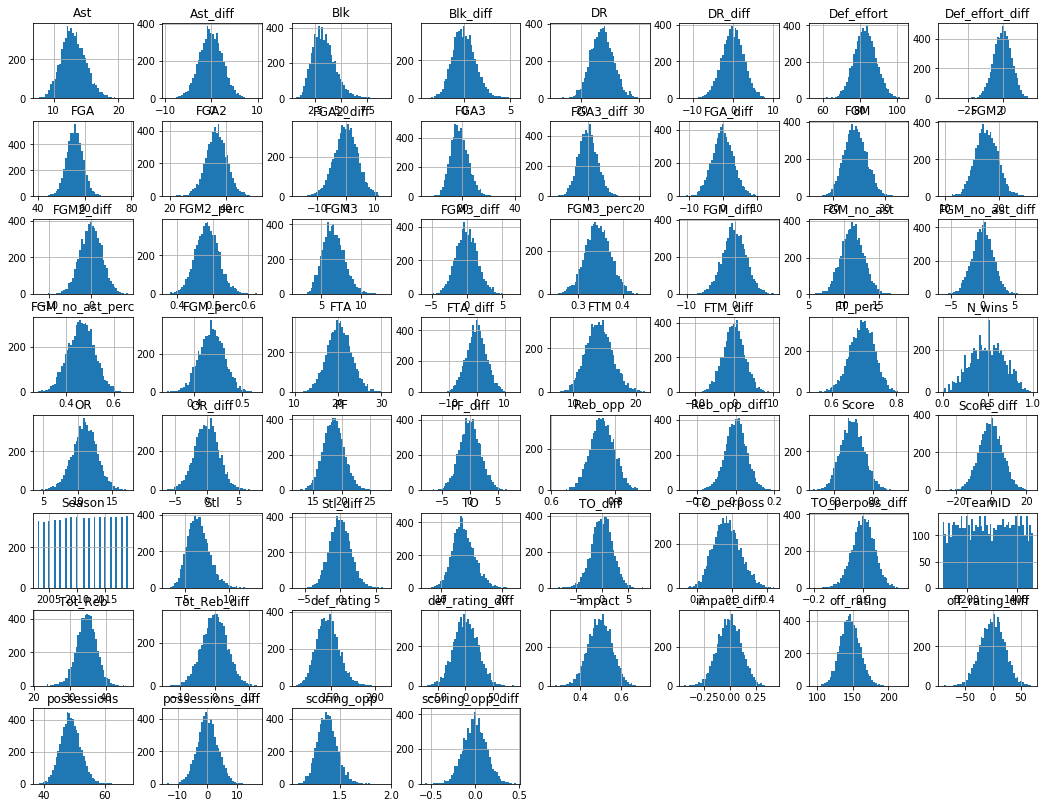

In [85]:
reg_s.hist(bins=50, figsize=(18, 14))
plt.show()

In [89]:
summary_reg = reg_s.groupby('Season')[[col for col in reg_s if col not in ['TeamID', 'Season']]].agg(['mean', 'max', 'min'])
summary_reg.columns = ['_'.join(col).strip() for col in summary_reg.columns.values]
summary_reg

,Score_mean,Score_max,Score_min,FGM_mean,FGM_max,FGM_min,FGA_mean,FGA_max,FGA_min,FGM3_mean,FGM3_max,FGM3_min,FGA3_mean,FGA3_max,FGA3_min,FTM_mean,FTM_max,FTM_min,FTA_mean,FTA_max,FTA_min,OR_mean,OR_max,OR_min,DR_mean,DR_max,DR_min,Ast_mean,Ast_max,Ast_min,TO_mean,TO_max,TO_min,Stl_mean,Stl_max,Stl_min,Blk_mean,Blk_max,Blk_min,PF_mean,PF_max,PF_min,FGM2_mean,FGM2_max,FGM2_min,FGA2_mean,FGA2_max,FGA2_min,Tot_Reb_mean,Tot_Reb_max,Tot_Reb_min,FGM_no_ast_mean,FGM_no_ast_max,FGM_no_ast_min,possessions_mean,possessions_max,possessions_min,off_rating_mean,off_rating_max,off_rating_min,scoring_opp_mean,scoring_opp_max,scoring_opp_min,TO_perposs_mean,TO_perposs_max,TO_perposs_min,def_rating_mean,def_rating_max,def_rating_min,impact_mean,impact_max,impact_min,Def_effort_mean,Def_effort_max,Def_effort_min,Reb_opp_mean,Reb_opp_max,Reb_opp_min,Score_diff_mean,Score_diff_max,Score_diff_min,FGM_diff_mean,FGM_diff_max,FGM_diff_min,FGA_diff_mean,FGA_diff_max,FGA_diff_min,FGM3_diff_mean,FGM3_diff_max,FGM3_diff_min,FGA3_diff_mean,FGA3_diff_max,FGA3_diff_min,FTM_diff_mean,FTM_diff_max,FTM_diff_min,FTA_diff_mean,FTA_diff_max,FTA_diff_min,OR_diff_mean,OR_diff_max,OR_diff_min,DR_diff_mean,DR_diff_max,DR_diff_min,Ast_diff_mean,Ast_diff_max,Ast_diff_min,TO_diff_mean,TO_diff_max,TO_diff_min,Stl_diff_mean,Stl_diff_max,Stl_diff_min,Blk_diff_mean,Blk_diff_max,Blk_diff_min,PF_diff_mean,PF_diff_max,PF_diff_min,FGM2_diff_mean,FGM2_diff_max,FGM2_diff_min,FGA2_diff_mean,FGA2_diff_max,FGA2_diff_min,Tot_Reb_diff_mean,Tot_Reb_diff_max,Tot_Reb_diff_min,FGM_no_ast_diff_mean,FGM_no_ast_diff_max,FGM_no_ast_diff_min,Def_effort_diff_mean,Def_effort_diff_max,Def_effort_diff_min,Reb_opp_diff_mean,Reb_opp_diff_max,Reb_opp_diff_min,possessions_diff_mean,possessions_diff_max,possessions_diff_min,off_rating_diff_mean,off_rating_diff_max,off_rating_diff_min,def_rating_diff_mean,def_rating_diff_max,def_rating_diff_min,scoring_opp_diff_mean,scoring_opp_diff_max,scoring_opp_diff_min,TO_perposs_diff_mean,TO_perposs_diff_max,TO_perposs_diff_min,impact_diff_mean,impact_diff_max,impact_diff_min,N_wins_mean,N_wins_max,N_wins_min,FGM_perc_mean,FGM_perc_max,FGM_perc_min,FGM2_perc_mean,FGM2_perc_max,FGM2_perc_min,FGM3_perc_mean,FGM3_perc_max,FGM3_perc_min,FT_perc_mean,FT_perc_max,FT_perc_min,FGM_no_ast_perc_mean,FGM_no_ast_perc_max,FGM_no_ast_perc_min
Season,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2003,69.680464,85.214286,49.629630,24.550438,30.321429,16.925926,56.093181,67.925926,39.785714,6.254943,10.074074,2.518519,18.051239,28.555556,9.740741,14.324645,20.034483,8.600000,20.621980,28.846154,12.714286,11.728868,17.259259,4.178571,23.101065,28.375000,16.821429,13.552585,18.892857,9.115385,14.929370,20.428571,10.033333,7.055060,11.800000,3.821429,3.244834,7.733333,0.655172,19.159224,25.740741,14.827586,18.295494,25.433333,11.321429,38.041942,50.400000,18.964286,34.829933,42.821429,21.000000,10.997852,15.433333,6.074074,49.498242,61.603571,38.909821,145.031517,194.483479,101.596227,1.365078,1.779885,1.066108,0.306075,0.404877,0.206833,145.573559,193.052000,114.608961,0.498497,0.647473,0.325480,81.091200,95.503034,62.396341,0.741416,0.824313,0.644698,-0.186005,15.766667,-20.080000,-0.063358,6.766667,-6.642857,-0.021090,10.666667,-10.916667,-0.013235,3.642857,-3.703704,-0.000199,11.111111,-8.928571,-0.046054,8.866667,-12.814815,-0.058898,10.300000,-18.296296,-0.020024,4.241379,-5.428571,-0.053883,7.586207,-7.357143,-0.052070,7.233333,-8.200000,0.029208,7.821429,-7.066667,-0.021927,5.066667,-5.285714,-0.020800,4.137931,-3.730769,0.025749,8.222222,-4.400000,-0.050123,7.466667,-7.000000,-0.020892,12.666667,-13.833333,-0.073907,9.896552,-12.464286,-0.011288,7.800000,-4.862069,-0.054164,15.976494,-15.121444,-0.000727,0.130514,-0.269979,0.056118,16.764815,-9.959167,-0.542043,54.738187,-85.004573,0.542043,85.004573,-54.738187,-0.002601,0.463875,-0.510329,0.000207,

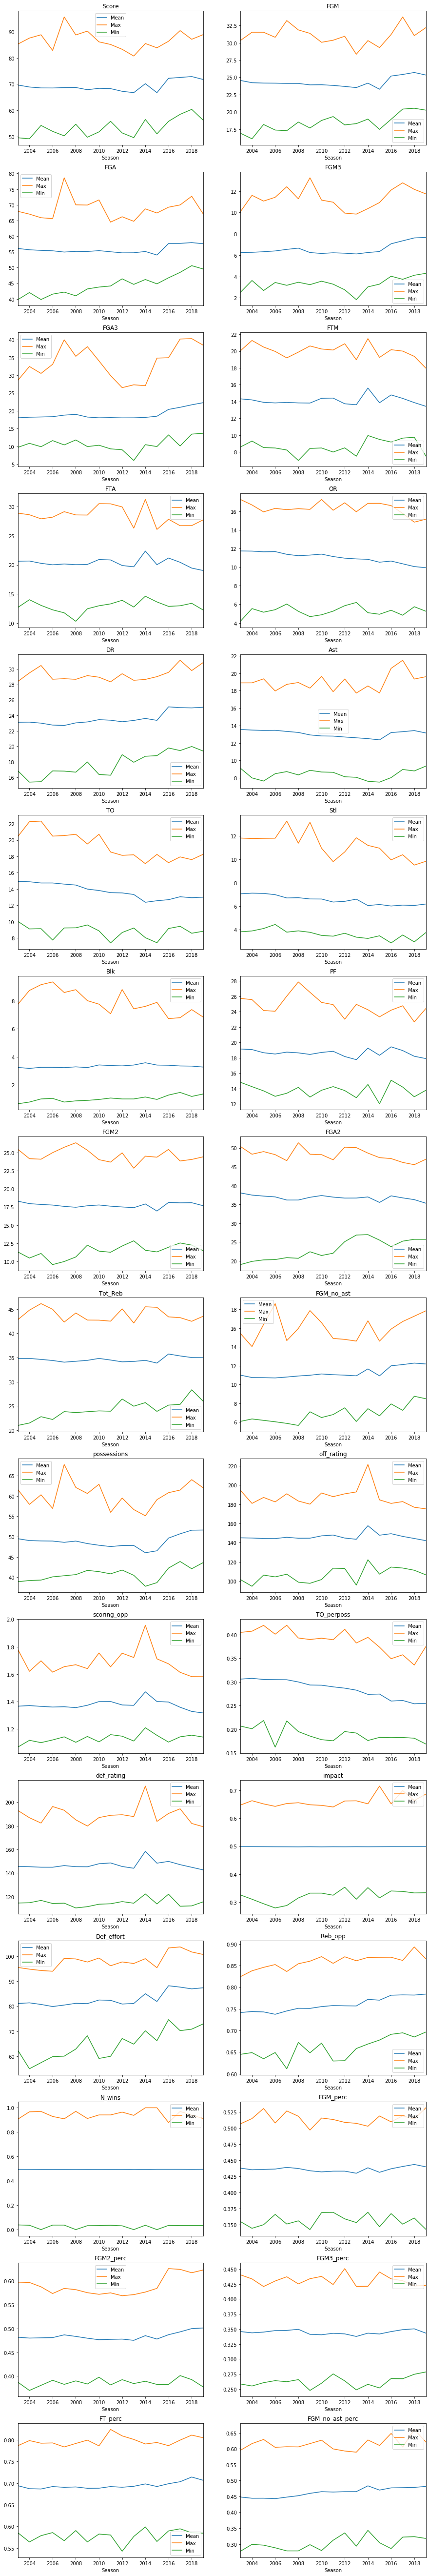

In [121]:
stats = [col.split('_mean')[0] for col in summary_reg if '_mean' in col and 'diff_' not in col]

fig, ax= plt.subplots(int(len(stats)/2),2, figsize=(15, 6*int(len(stats)/2)))

i, j = 0, 0

for col in stats:
    summary_reg[[col+'_mean', col+'_max', col+'_min']].plot(title=col,ax=ax[i][j])
    ax[i][j].legend(labels=['Mean', 'Max', 'Min'])
    if j == 0:
        j = 1
    else:
        j = 0
        i += 1

plt.show()

In [82]:
playoff.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,WFG_perc,WFGM2,WFGA2,WFG2_perc,WFG3_perc,WFT_perc,WTot_Reb,WFGM_no_ast,WFGM_no_ast_perc,Wpossessions,Woff_rating,Wscoring_opp,WTO_perposs,LFG_perc,LFGM2,LFGA2,LFG2_perc,LFG3_perc,LFT_perc,LTot_Reb,LFGM_no_ast,LFGM_no_ast_perc,Lpossessions,Loff_rating,Lscoring_opp,LTO_perposs,Wdef_rating,Ldef_rating,Wimpact,Limpact,WDef_effort,LDef_effort,WReb_opp,LReb_opp,Score_diff,FGM_diff,FGA_diff,FGM3_diff,FGA3_diff,FTM_diff,FTA_diff,OR_diff,DR_diff,Ast_diff,TO_diff,Stl_diff,Blk_diff,PF_diff,FGM2_diff,FGA2_diff,Tot_Reb_diff,FGM_no_ast_diff,Def_effort_diff,Reb_opp_diff,possessions_diff,off_rating_diff,def_rating_diff,scoring_opp_diff,TO_perposs_diff,impact_diff
0,2003,134,1421,92,1411,84,N,1,32,69,11,29,17,26,14,30,17,12,5,3,22,29,67,12,31,14,31,17,28,16,15,5,0,22,0.463768,21,40,0.525000,0.379310,0.653846,44,15,0.468750,54.650,168.344007,1.488564,0.219579,0.432836,17,36,0.472222,0.387097,0.451613,45,13,0.448276,50.275,167.081054,1.625559,0.298359,167.081054,168.344007,0.567114,0.432886,115.477612,104.043478,0.789474,0.756757,8,3,2,-1,-2,3,-5,-3,2,1,-3,0,3,0,4,4,-1,2,11.434134,0.032717,4.375,1.262953,-1.262953,-0.136996,-0.078780,0.134228
1,2003,136,1112,80,1436,51,N,0,31,66,7,23,11,14,11,36,22,16,10,7,8,20,64,4,16,7,7,8,26,12,17,10,3,15,0.469697,24,43,0.558140,0.304348,0.785714,47,9,0.290323,64.350,124.320124,1.128982,0.248640,0.312500,16,48,0.333333,0.250000,1.000000,34,8,0.400000,69.675,73.196986,0.966272,0.243990,73.196986,124.320124,0.709265,0.290735,90.750000,82.045455,0.818182,0.742857,29,11,2,3,7,4,7,3,10,10,-1,0,4,-7,8,-5,13,1,8.704545,0.075325,-5.325,51.123138,-51.123138,0.162710,0.004650,0.418530
2,2003,136,1113,84,1272,71,N,0,31,59,6,14,16,22,10,27,18,9,7,4,19,25,69,7,28,14,21,20,22,11,12,2,5,18,0.525424,25,45,0.555556,0.428571,0.727273,37,13,0.419355,47.550,176.656151,1.460568,0.189274,0.362319,18,41,0.439024,0.250000,0.666667,42,14,0.560000,51.025,139.147477,1.547771,0.235179,139.147477,176.656151,0.645161,0.354839,97.405797,74.847458,0.613636,0.785714,13,6,-10,-1,-14,2,1,-10,5,7,-3,5,-1,1,7,4,-5,-1,22.558339,-0.172078,-3.475,37.508675,-37.508675,-0.087203,-0.045904,0.290323
3,2003,136,1141,79,1166,73,N,0,29,53,3,7,18,25,11,20,15,18,13,1,19,27,60,7,17,12,17,14,17,20,21,6,6,21,0.547170,26,46,0.565217,0.428571,0.720000,31,14,0.482759,48.125,164.155844,1.348052,0.374026,0.450000,20,43,0.465116,0.411765,0.705882,31,7,0.259259,58.925,123.886296,1.155282,0.356385,123.886296,164.155844,0.553333,0.446667,70.850000,63.849057,0.606061,0.708333,6,2,-7,-4,-10,6,8,-3,3,-5,-3,7,-5,-2,6,3,0,7,7.000943,-0.102273,-10.800,40.269548,-40.269548,0.192770,0.017641,0.106667
4,2003,136,1143,76,1301,74,N,1,27,64,7,20,15,23,18,20,17,13,8,2,14,25,56,9,21,15,20,10,26,16,14,5,8,19,0.421875,20,44,0.454545,0.350000,0.652174,38,10,0.370370,48.075,158.086323,1.558502,0.270411,0.446429,16,35,0.457143,0.428571,0.750000,36,9,0.360000,50.500,146.534653,1.297030,0.277228,146.534653,158.086323,0.489796,0.510204,82.750000,83.562500,0.645161,0.702703,2,2,8,-2,-1,0,3,8,-6,1,-1,3,-6,-5,4,9,2,1,-0.812500,-0.057541,-2.425,11.551670,-11.551670,0.261473,-0.006817,-0.020408


In [83]:
playoff = full_stats(playoff)
playoff.head()

,Season,TeamID,Score,FGM,FGA,FGM3,FGA3,FTM,FTA,OR,DR,Ast,TO,Stl,Blk,PF,FGM2,FGA2,Tot_Reb,FGM_no_ast,possessions,off_rating,scoring_opp,TO_perposs,def_rating,impact,Def_effort,Reb_opp,Score_diff,FGM_diff,FGA_diff,FGM3_diff,FGA3_diff,FTM_diff,FTA_diff,OR_diff,DR_diff,Ast_diff,TO_diff,Stl_diff,Blk_diff,PF_diff,FGM2_diff,FGA2_diff,Tot_Reb_diff,FGM_no_ast_diff,Def_effort_diff,Reb_opp_diff,possessions_diff,off_rating_diff,def_rating_diff,scoring_opp_diff,TO_perposs_diff,impact_diff,N_wins,FGM_perc,FGM2_perc,FGM3_perc,FT_perc,FGM_no_ast_perc
0,2003,1104,62.000000,22.000000,52.000000,5.00,12.000000,13.000000,16.000000,9.000000,20.000000,13.000000,8.000000,2.00,6.000000,21.000000,17.000000,40.0,29.00,9.00,43.40000,142.857143,1.373272,0.184332,211.690363,0.450893,79.775510,0.666667,-5.000000,3.000000,3.000000,-2.000000,-6.000000,-9.0,-10.000000,-4.000000,-2.00,-2.000000,0.0,1.00,4.000000,4.0,5.000000,9.000000,-6.000000,5.0,10.160126,-0.066667,11.75000,-68.833220,68.833220,-0.565117,-0.068433,-0.098214,0.000000,0.423077,0.425000,0.416667,0.812500,0.409091
1,2003,1112,84.750000,31.000000,67.750000,7.75,20.750000,15.000000,19.250000,13.500000,30.250000,18.750000,13.500000,9.25,4.500000,15.500000,23.250000,47.0,43.75,12.25,58.60625,146.884377,1.331215,0.234738,119.315216,0.584218,93.092676,0.764791,11.000000,4.000000,1.000000,-0.500000,-3.000000,3.5,3.250000,1.500000,4.75,3.000000,-2.0,0.75,0.250000,-3.5,4.500000,4.000000,6.250000,1.0,7.877579,0.069702,-4.04375,27.569161,-27.569161,0.136581,-0.013332,0.168436,0.750000,0.457565,0.494681,0.373494,0.779221,0.395161
2,2003,1113,80.000000,29.500000,64.000000,5.00,14.500000,16.000000,22.500000,13.500000,20.500000,14.500000,10.000000,7.00,4.500000,20.000000,24.500000,49.5,34.00,15.00,49.81250,161.299751,1.497687,0.200254,192.720831,0.467929,81.880865,0.675239,-9.500000,-3.000000,0.000000,-1.000000,-4.000000,-2.5,-5.000000,-2.500000,-4.50,-1.500000,-2.5,3.00,-1.000000,1.0,-2.000000,4.000000,-7.000000,-1.5,-0.695038,-0.059081,2.37500,-31.421080,31.421080,-0.133097,-0.065568,-0.064141,0.500000,0.460938,0.494949,0.344828,0.711111,0.508475
3,2003,1120,70.333333,25.333333,58.666667,7.00,19.666667,12.666667,16.666667,13.333333,23.666667,12.333333,15.333333,6.00,5.333333,17.666667,18.333333,39.0,37.00,13.00,52.75000,133.428388,1.265513,0.290526,140.897544,0.532080,80.967999,0.676257,2.333333,2.333333,0.666667,0.666667,-0.666667,-3.0,-2.666667,-0.666667,2.00,2.333333,2.0,-2.00,-0.666667,-2.0,1.666667,1.333333,1.333333,0.0,6.485960,0.023479,4.60000,-7.469156,7.469156,-0.126099,0.009295,0.064160,0.666667,0.431818,0.470085,0.355932,0.760000,0.513158
4,2003,1122,64.000000,24.000000,54.000000,2.00,21.000000,14.000000,22.000000,8.000000,21.000000,11.000000,18.000000,5.00,3.000000,18.000000,22.000000,33.0,29.00,13.00,53.55000,119.514472,1.203548,0.336134,141.389231,0.353147,73.314286,0.600000,-22.000000,-11.000000,-16.000000,-6.000000,-3.000000,6.0,9.000000,-7.000000,-8.00,-7.000000,6.0,-7.00,-1.000000,-4.0,-5.000000,-13.000000,-15.000000,-4.0,-25.130159,-0.366667,-7.27500,-21.874759,21.874759,-0.048815,0.138847,-0.293706,0.000000,0.444444,0.666667,0.095238,0.636364,0.541667
